
# Housing Market Analysis Project

---

**Project Name:** `Ames House Prices`  
**Student Name:** `Ashok Medasani`  
**Professor Name:** `Kamal Lamsal`
---

## Introduction
In this project, we will conduct an exploratory data analysis on a housing dataset to uncover trends, relationships, and insights into housing prices and features.

## Step 1: Load the Data

In [1]:
# Load the data
import pandas as pd
df = pd.read_csv('train.csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
# Display data types
print("Data Types:")
print(df.dtypes)

Data Types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [3]:
# Set display option to show all rows
pd.options.display.max_rows = None

# Now, when you print the missing data, all rows will be displayed
print("Data Types:")
print(df.dtypes)

Data Types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating      

In [4]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a DataFrame to display them side-by-side
column_summary = pd.DataFrame({
    'Numerical Columns': pd.Series(numerical_columns),
    'Categorical Columns': pd.Series(categorical_columns)
})

# Display the DataFrame
print(column_summary)


   Numerical Columns Categorical Columns
0                 Id            MSZoning
1         MSSubClass              Street
2        LotFrontage               Alley
3            LotArea            LotShape
4        OverallQual         LandContour
5        OverallCond           Utilities
6          YearBuilt           LotConfig
7       YearRemodAdd           LandSlope
8         MasVnrArea        Neighborhood
9         BsmtFinSF1          Condition1
10        BsmtFinSF2          Condition2
11         BsmtUnfSF            BldgType
12       TotalBsmtSF          HouseStyle
13          1stFlrSF           RoofStyle
14          2ndFlrSF            RoofMatl
15      LowQualFinSF         Exterior1st
16         GrLivArea         Exterior2nd
17      BsmtFullBath          MasVnrType
18      BsmtHalfBath           ExterQual
19          FullBath           ExterCond
20          HalfBath          Foundation
21      BedroomAbvGr            BsmtQual
22      KitchenAbvGr            BsmtCond
23      TotRmsAb

In [5]:
# Count different data types
data_types_count = df.dtypes.value_counts()
print("Data Types Count:\n", data_types_count)

Data Types Count:
 object     43
int64      35
float64     3
Name: count, dtype: int64


In [6]:
# Show numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:\n", numerical_columns)

# Show categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:\n", categorical_columns)

Numerical Columns:
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical Columns:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFin

In [7]:
import numpy as np

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number])
print("Numerical Columns:\n", numeric_features.columns)

# Select categorical features
categorical_features = df.select_dtypes(include=['object'])
print("\nCategorical Columns:\n", categorical_features.columns)


Numerical Columns:
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical Columns:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFin

In [8]:
print(df.shape)

(1460, 81)


## Step 2: Inspect Data Types and Missing Values

In [9]:
# Display columns with missing values and their counts
print("\nColumns with Missing Values:")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)


Columns with Missing Values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


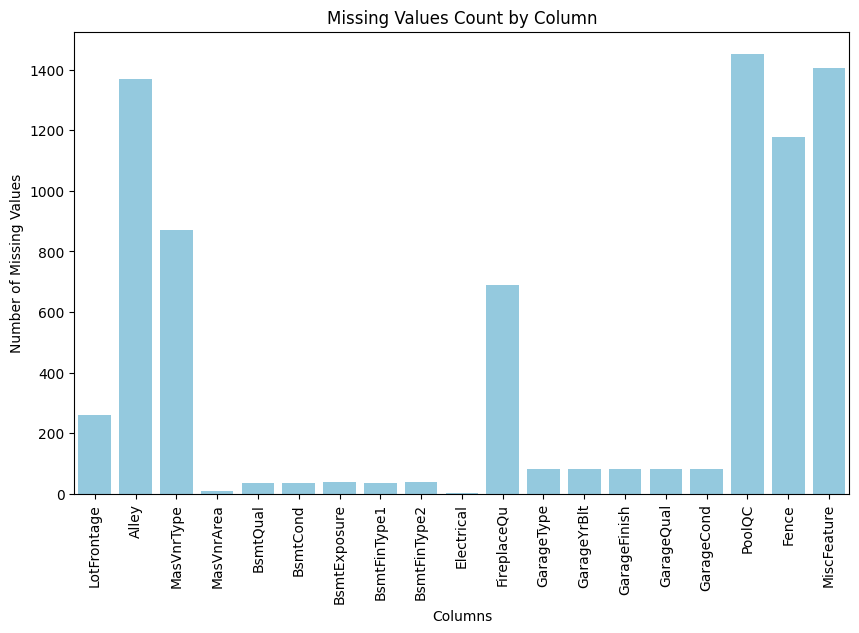

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing data counts for columns with missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, color="skyblue")
plt.xticks(rotation=90)
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

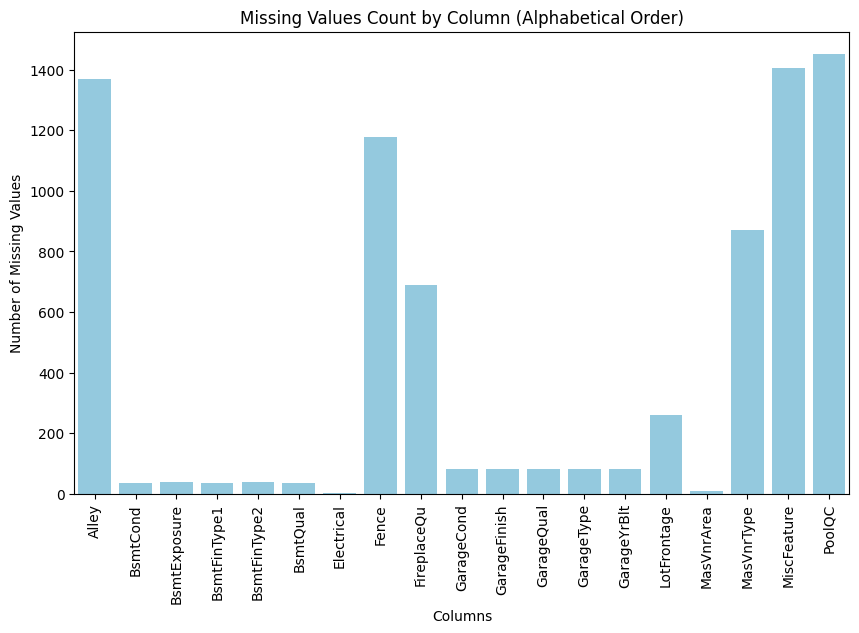

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing data counts for columns with missing values and sort by alphabetical order
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_index()  # Sort by column name (alphabetical order)

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, color="skyblue")
plt.xticks(rotation=90)
plt.title("Missing Values Count by Column (Alphabetical Order)")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

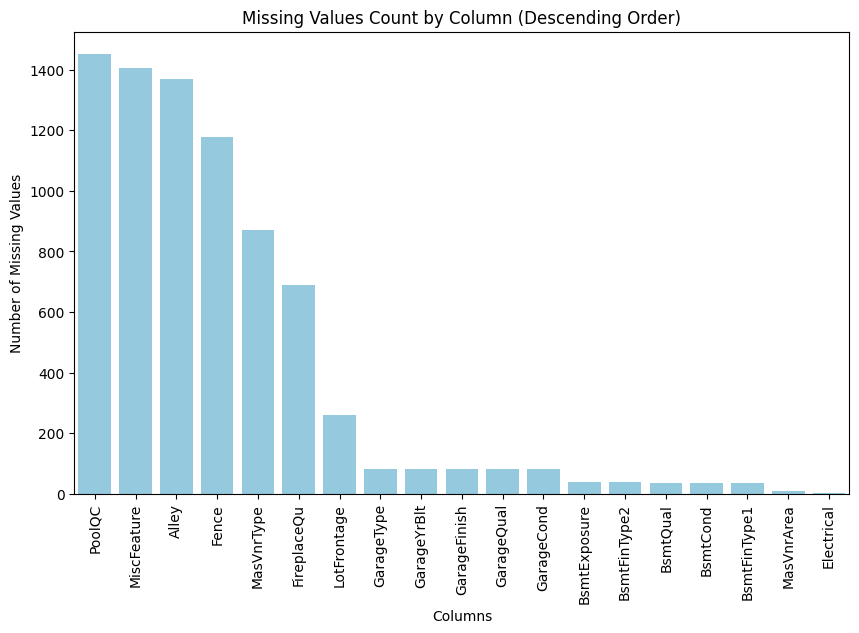

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing data counts for columns with missing values and sort by descending count
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)  # Sort by count, descending

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, color="skyblue")
plt.xticks(rotation=90)
plt.title("Missing Values Count by Column (Descending Order)")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

# Univariate Analysis

`Steps for Univariate Analysis`
> 1. **Numerical Variables**
We can use histograms to show the distribution of each numerical variable.
We can calculate and display summary statistics like mean, median, and standard deviation.
Box plots can also be helpful for spotting outliers.

> 2. **Categorical Variables**
Bar plots are useful for visualizing the frequency of each category in categorical variables.
We can also display value counts for each category to understand the distribution of values.


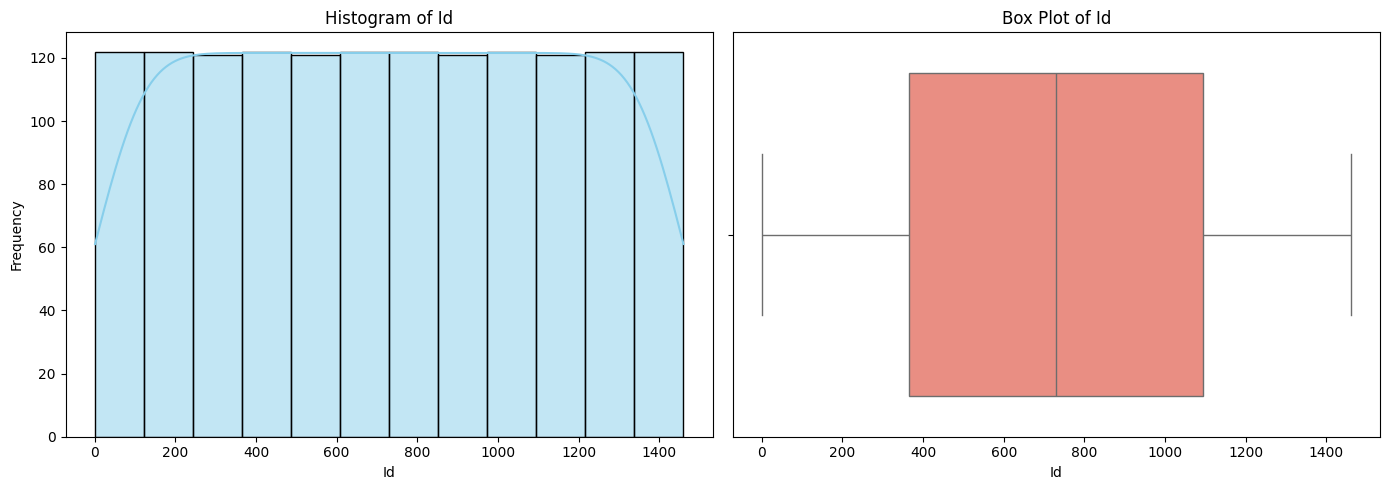


Summary statistics for Id:
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64




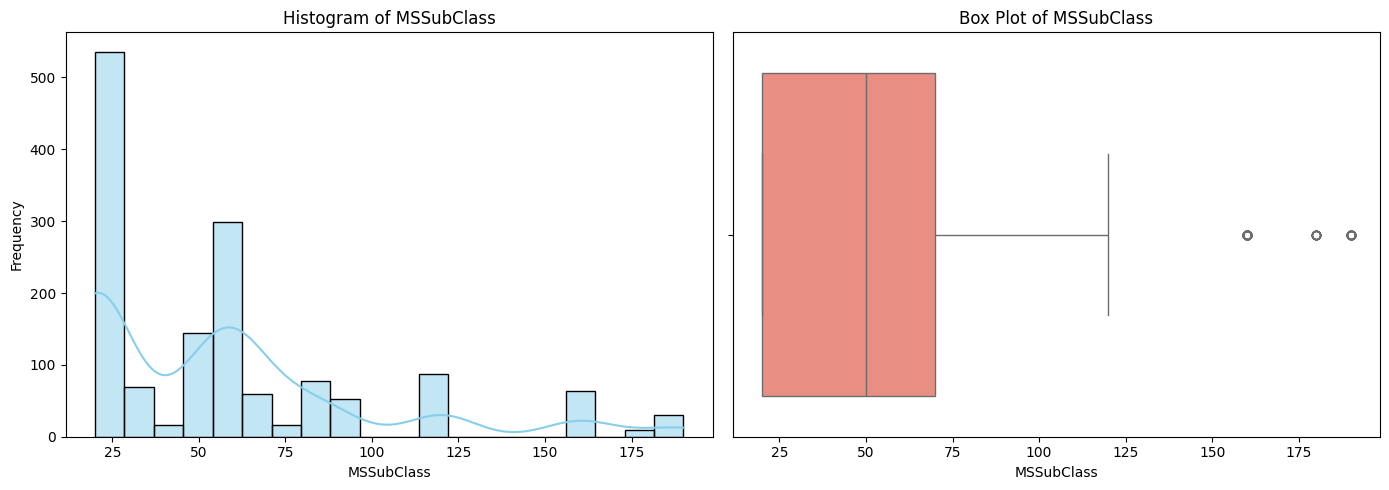


Summary statistics for MSSubClass:
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64




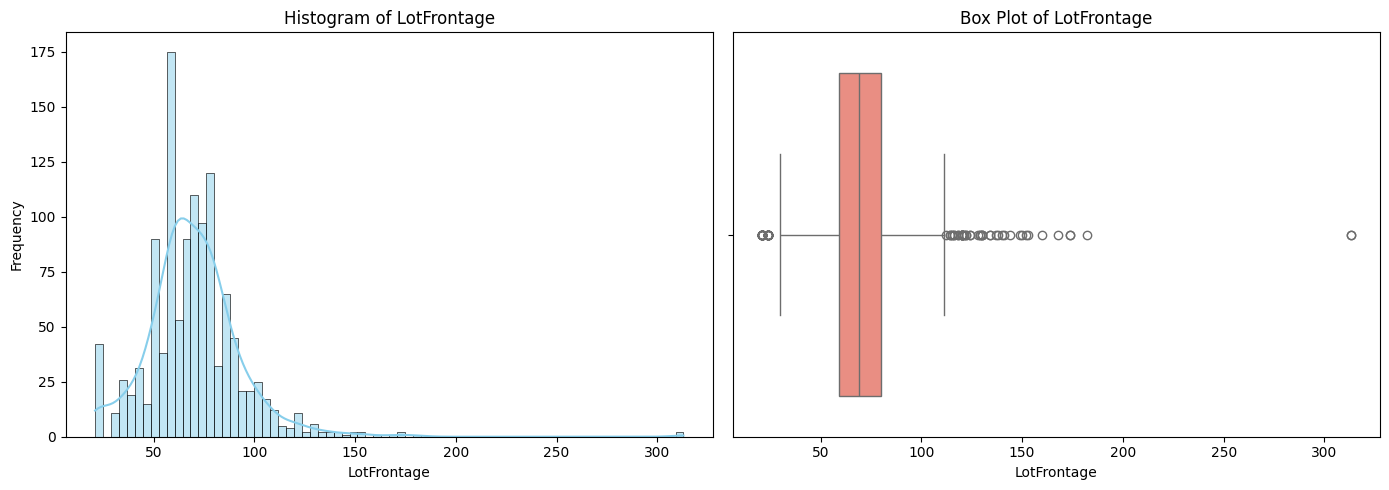


Summary statistics for LotFrontage:
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64




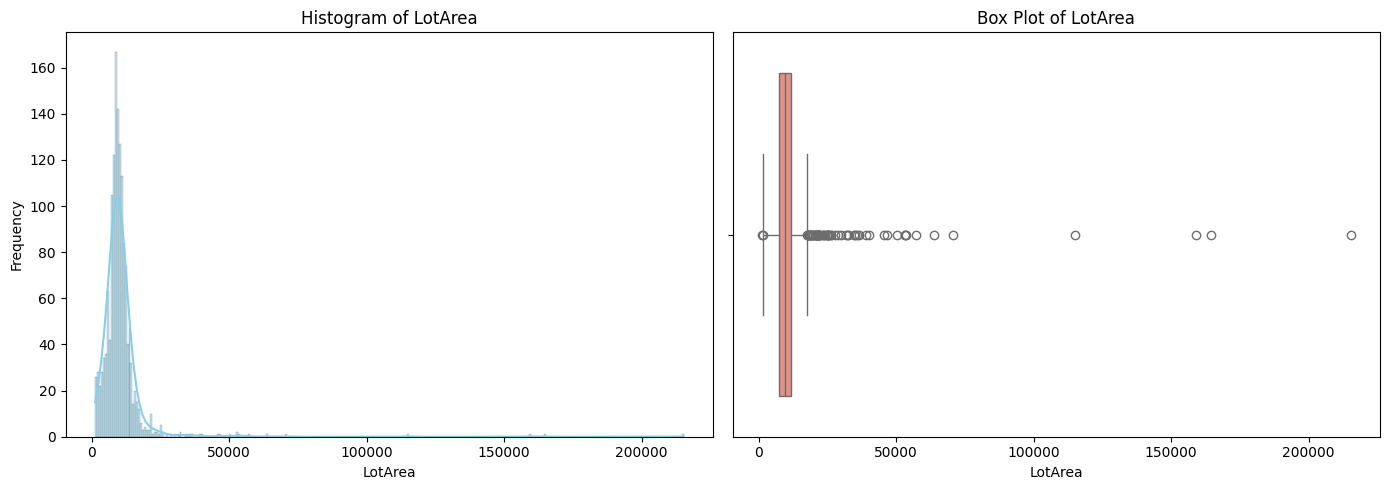


Summary statistics for LotArea:
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64




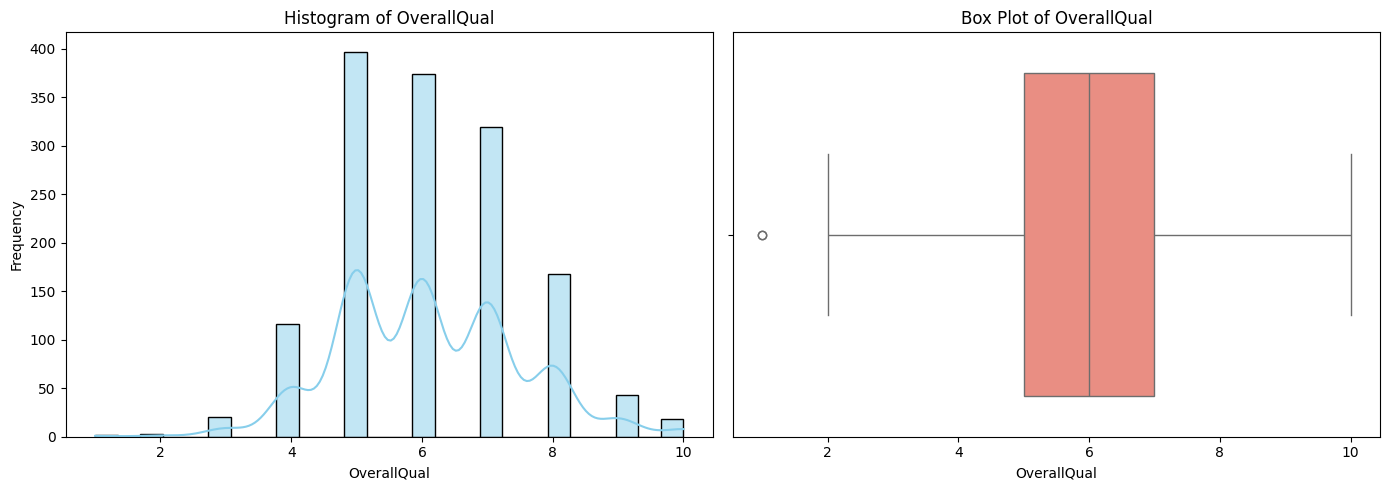


Summary statistics for OverallQual:
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64




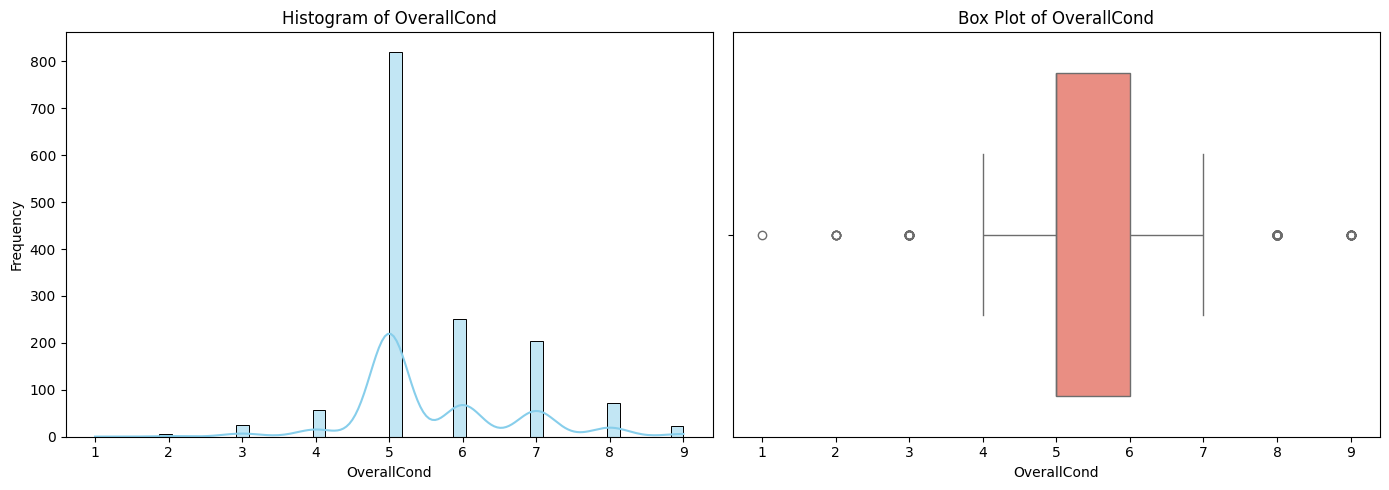


Summary statistics for OverallCond:
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64




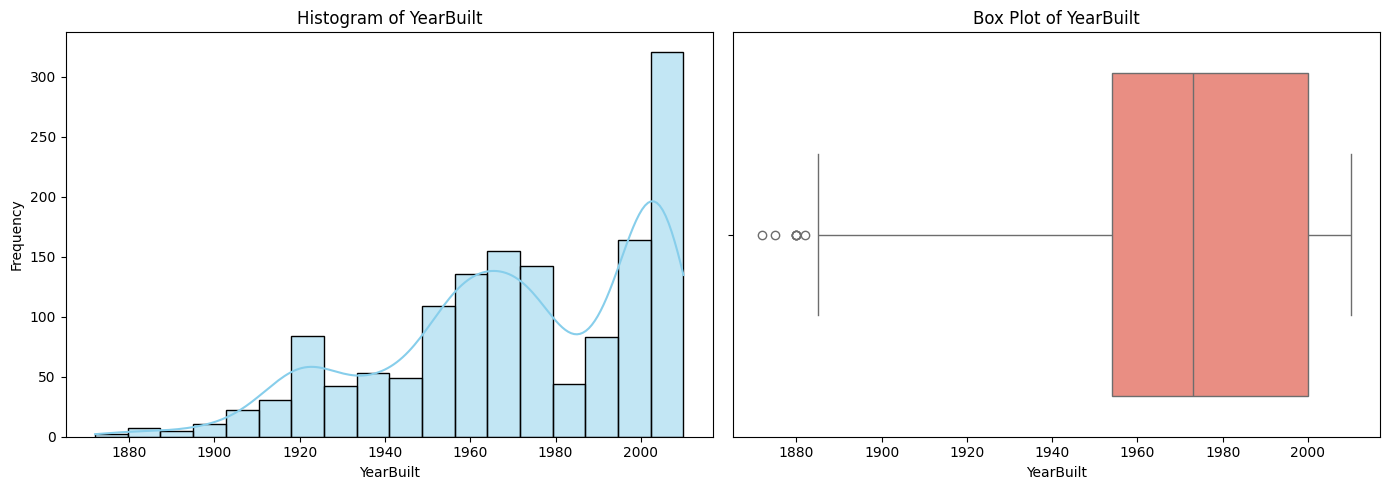


Summary statistics for YearBuilt:
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64




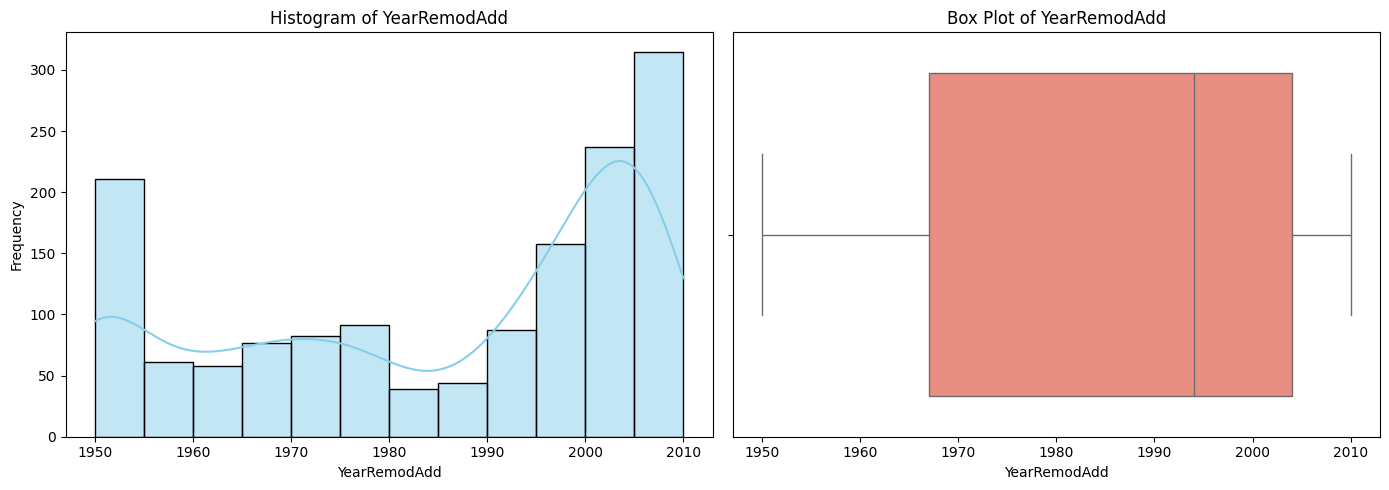


Summary statistics for YearRemodAdd:
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64




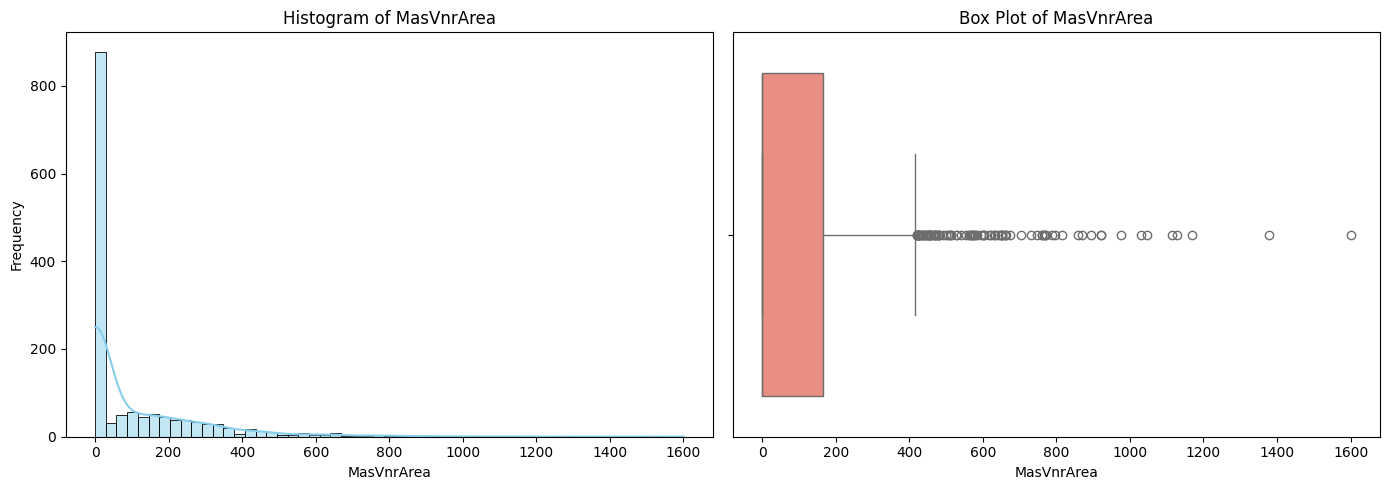


Summary statistics for MasVnrArea:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64




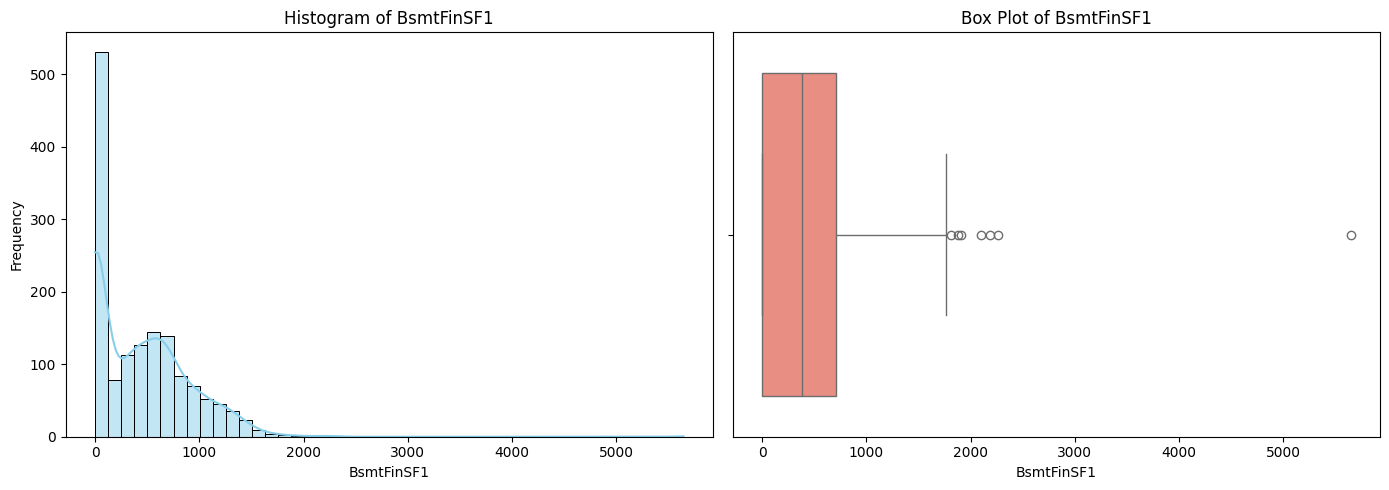


Summary statistics for BsmtFinSF1:
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64




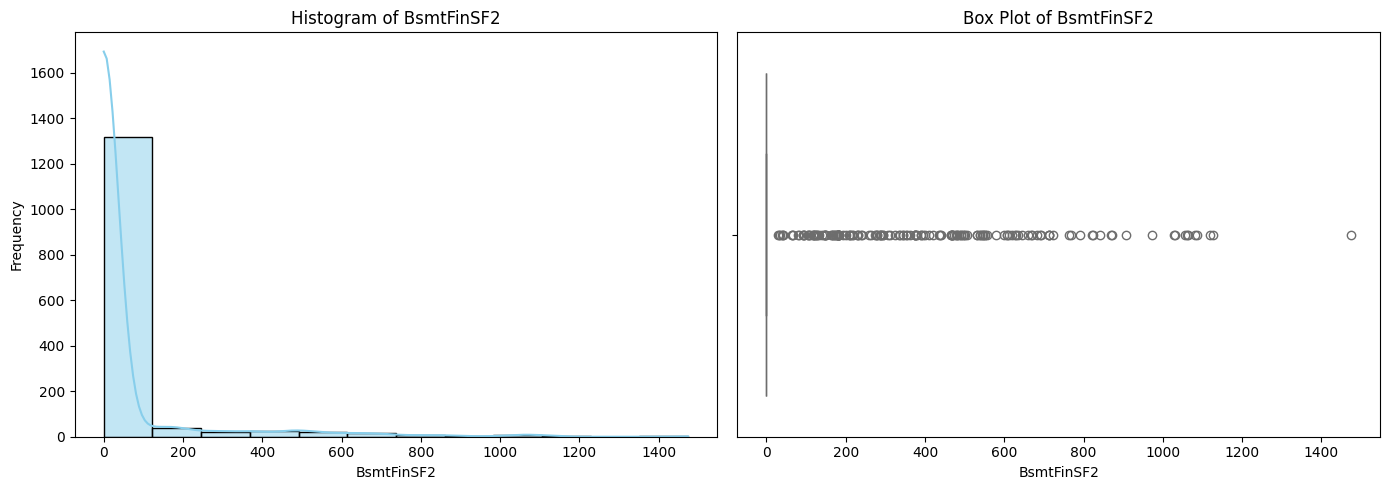


Summary statistics for BsmtFinSF2:
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64




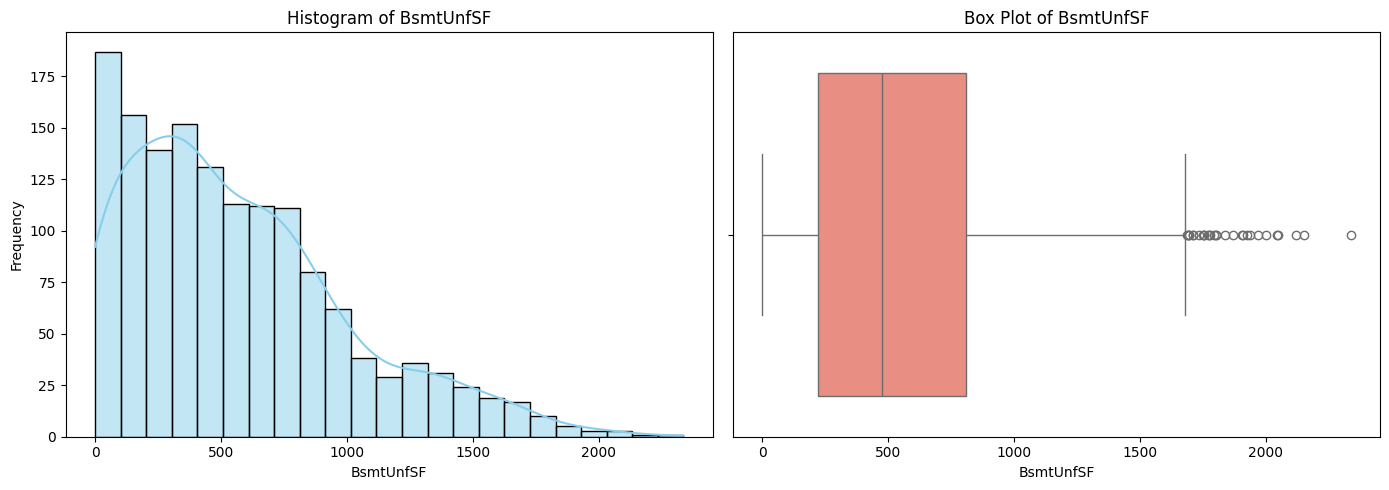


Summary statistics for BsmtUnfSF:
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64




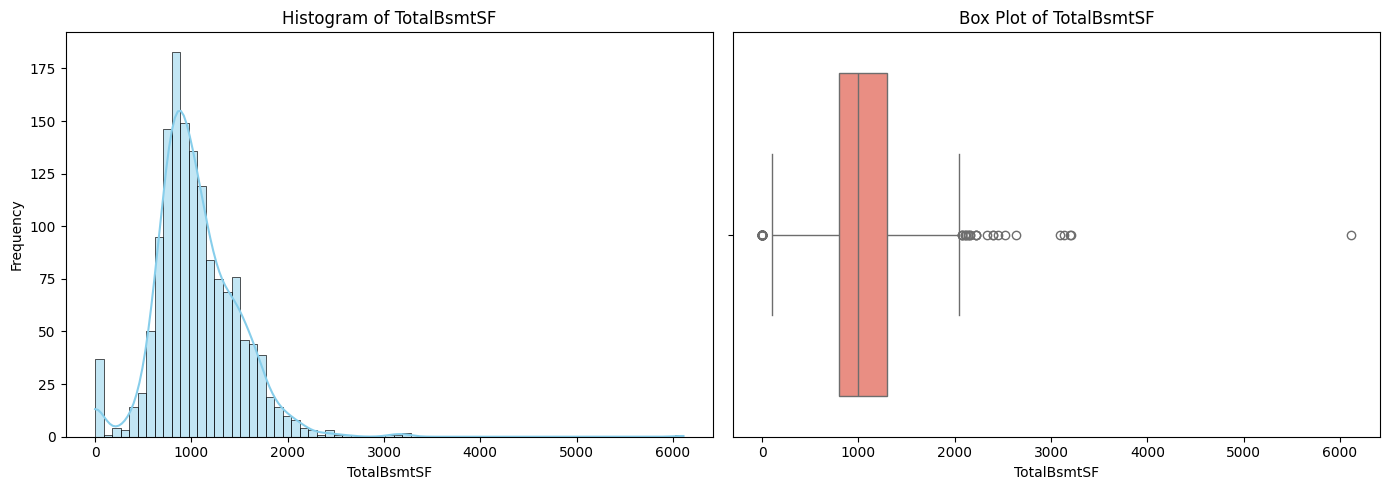


Summary statistics for TotalBsmtSF:
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64




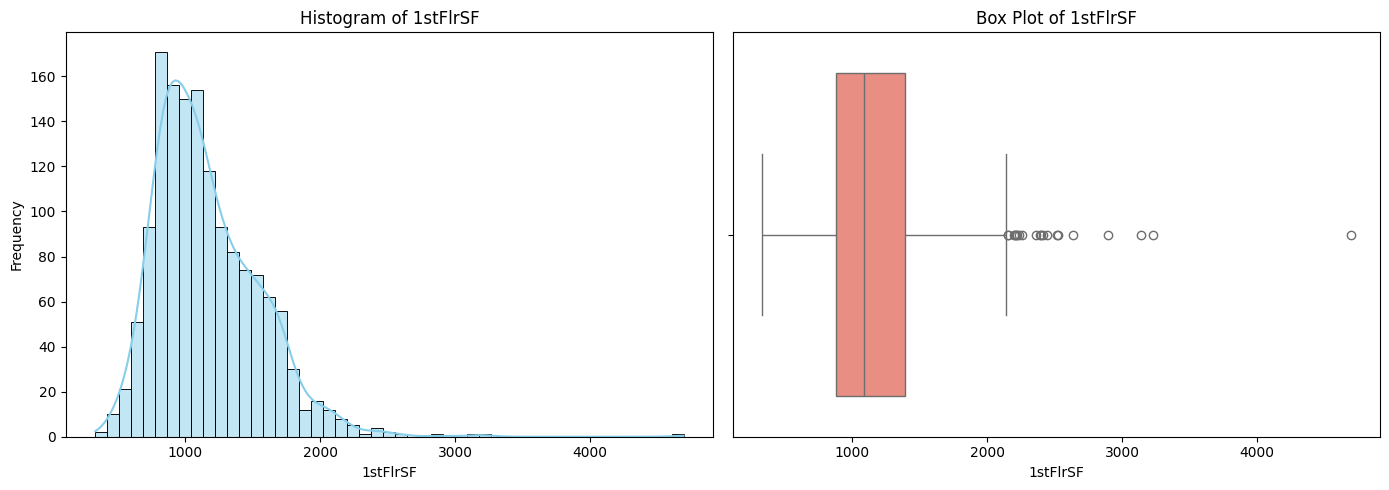


Summary statistics for 1stFlrSF:
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64




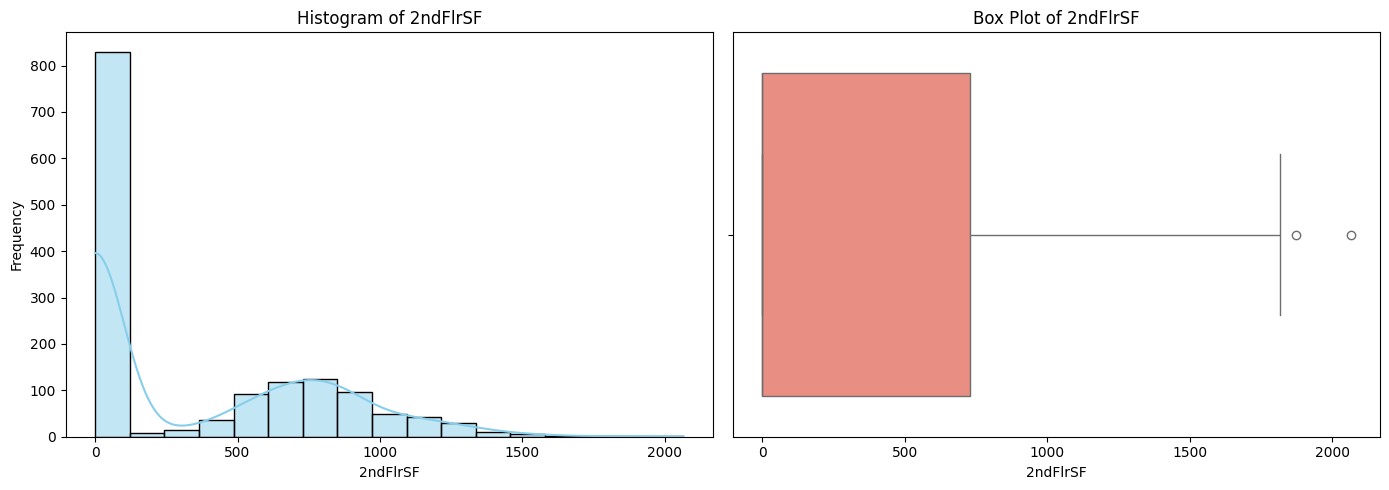


Summary statistics for 2ndFlrSF:
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64




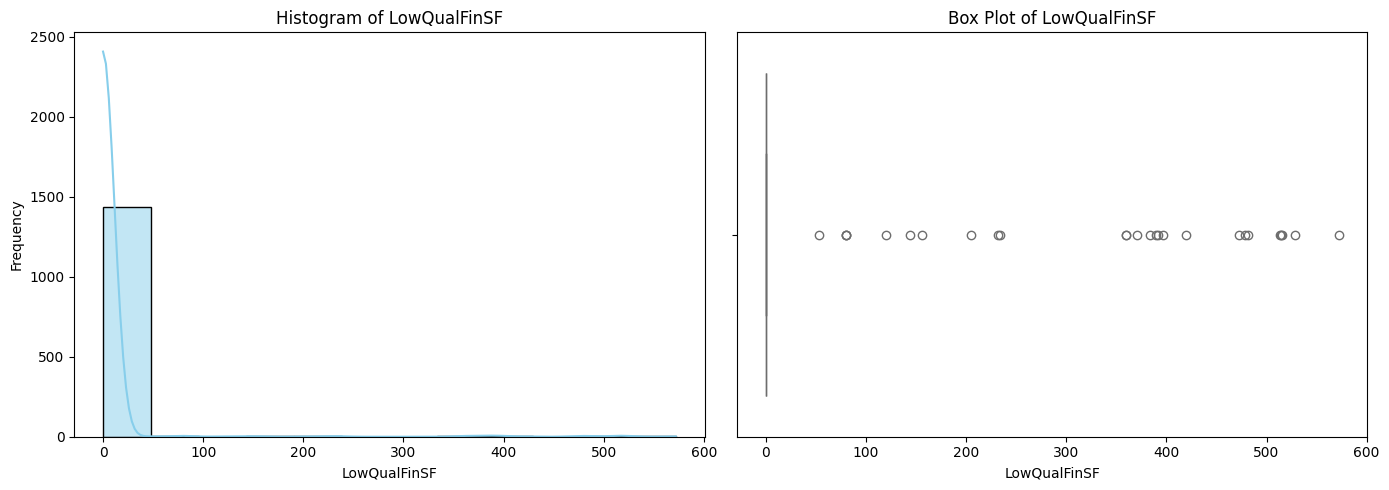


Summary statistics for LowQualFinSF:
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64




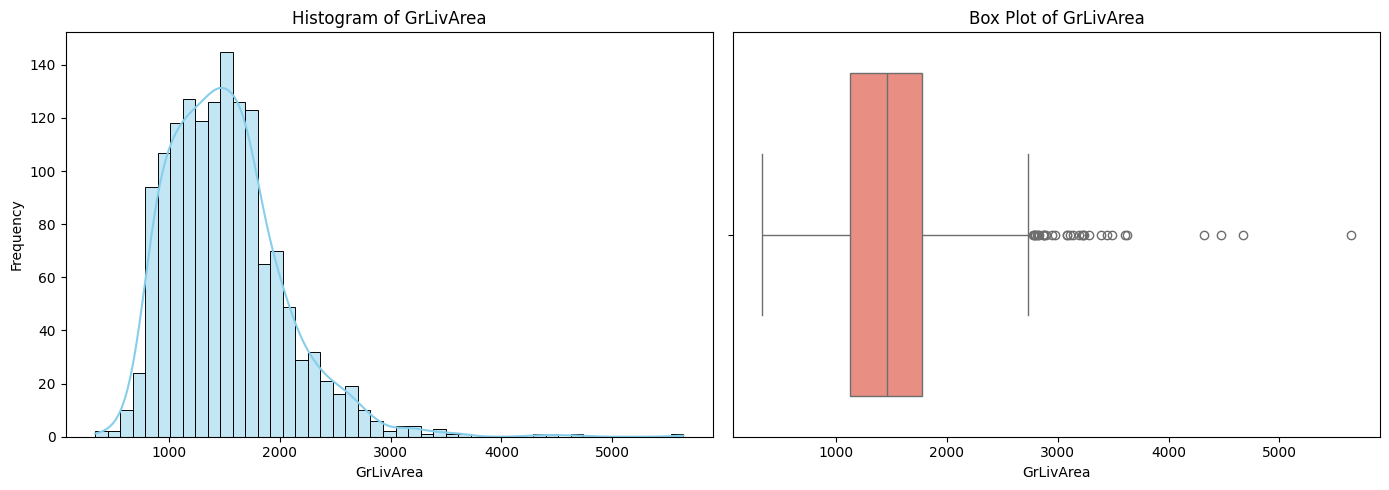


Summary statistics for GrLivArea:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64




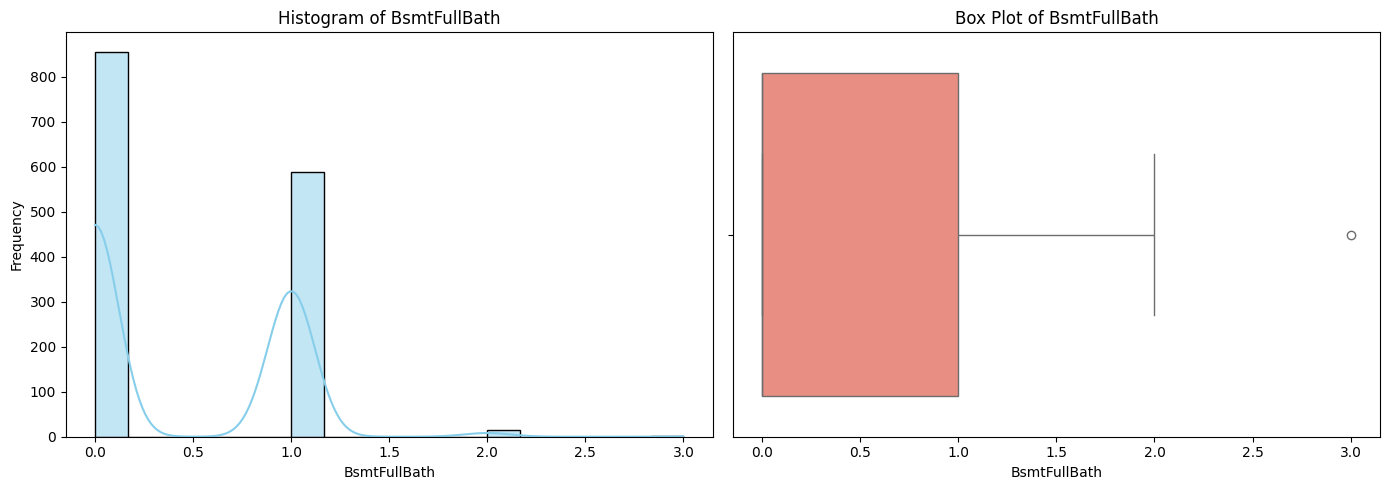


Summary statistics for BsmtFullBath:
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64




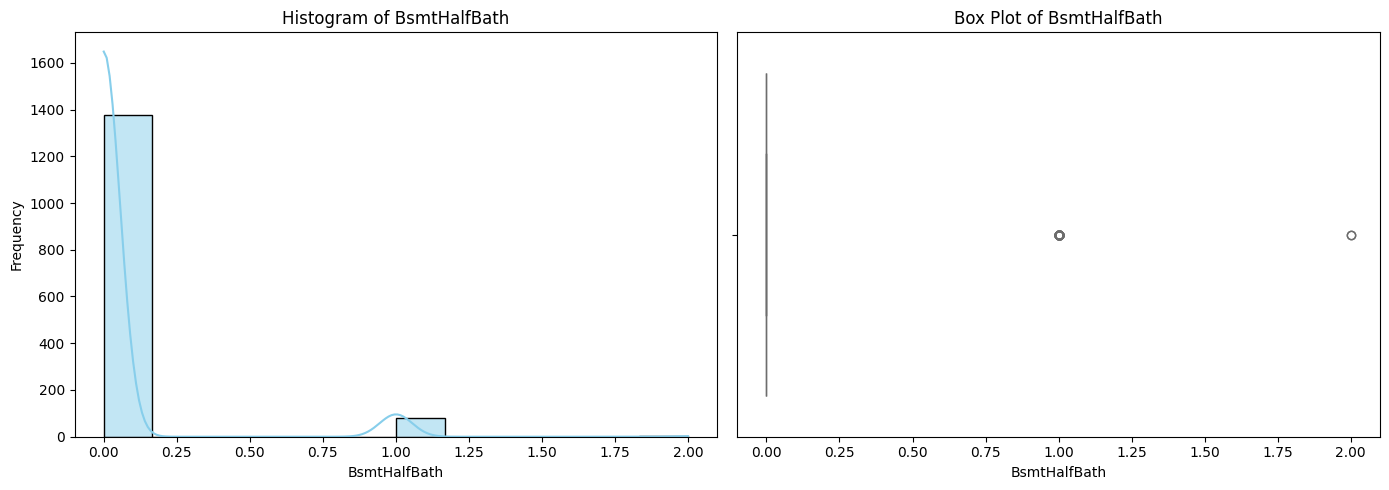


Summary statistics for BsmtHalfBath:
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64




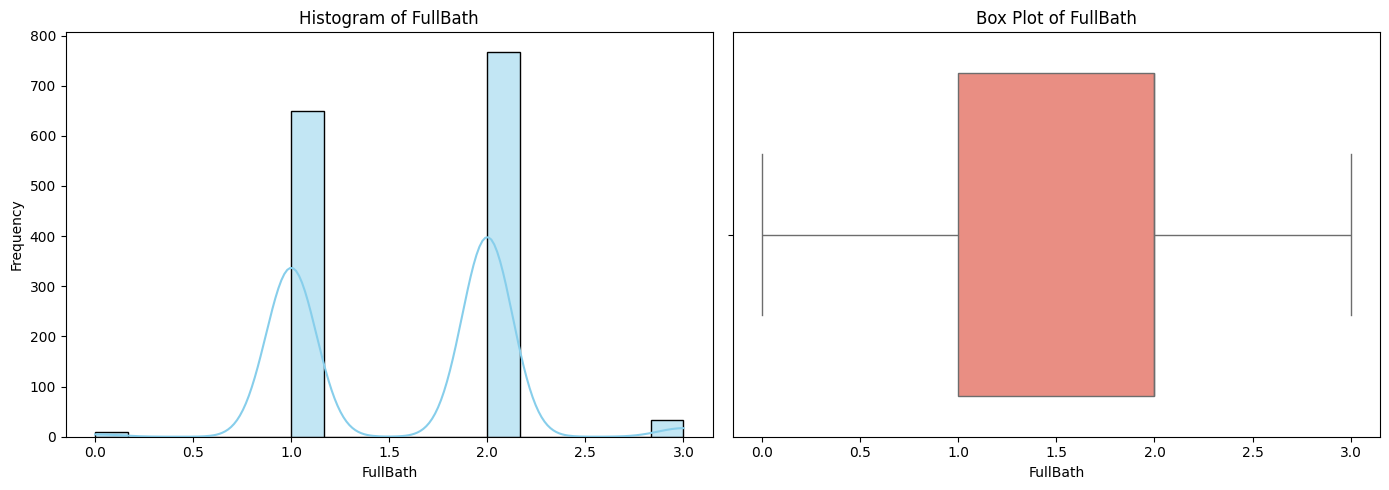


Summary statistics for FullBath:
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64




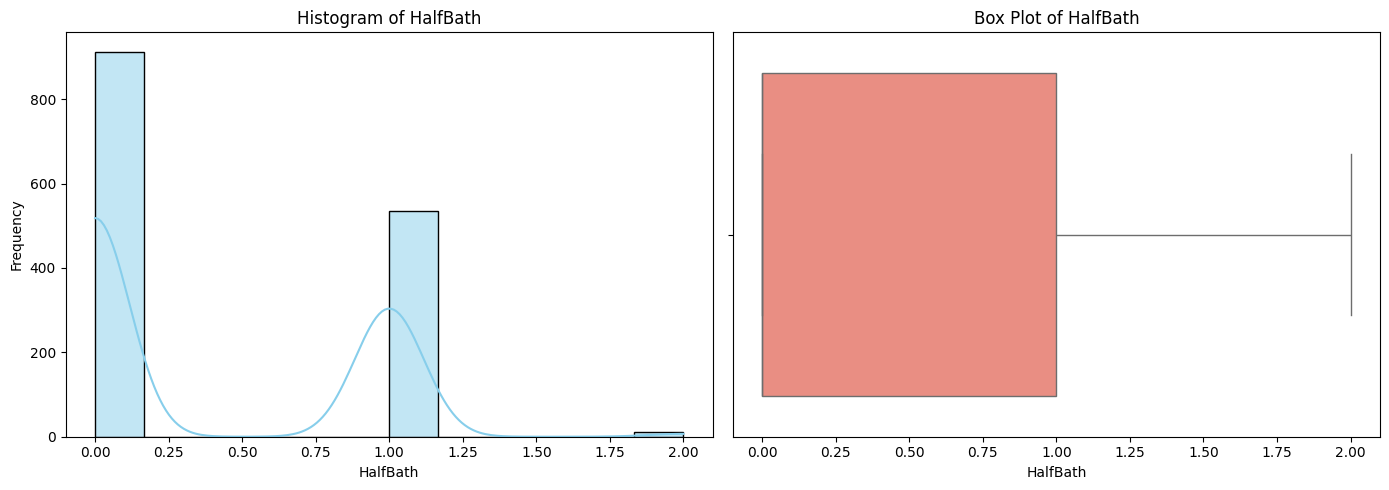


Summary statistics for HalfBath:
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64




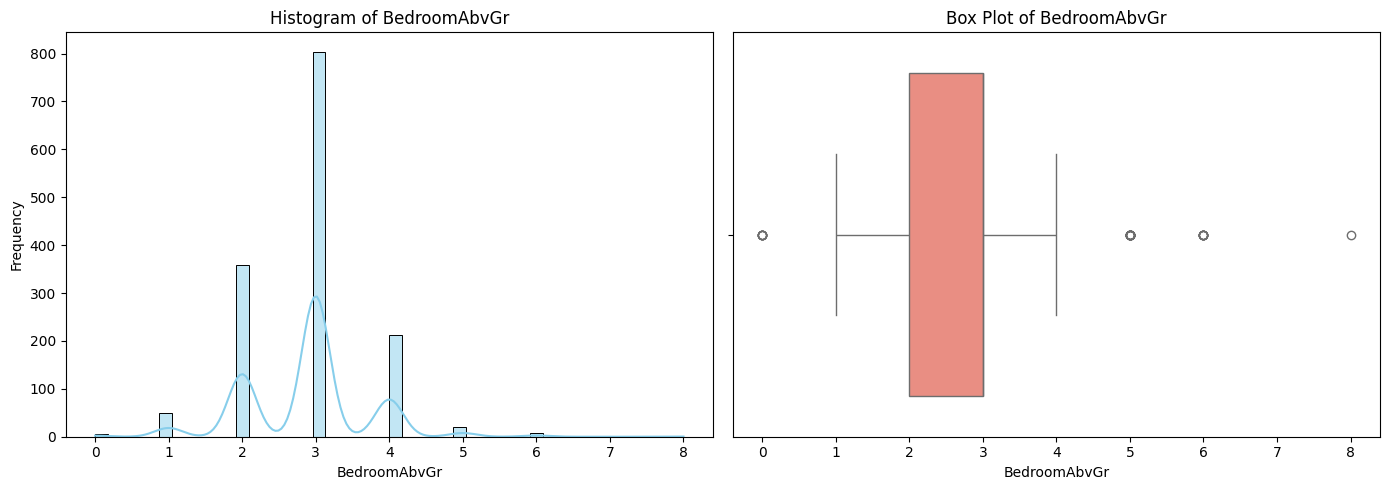


Summary statistics for BedroomAbvGr:
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64




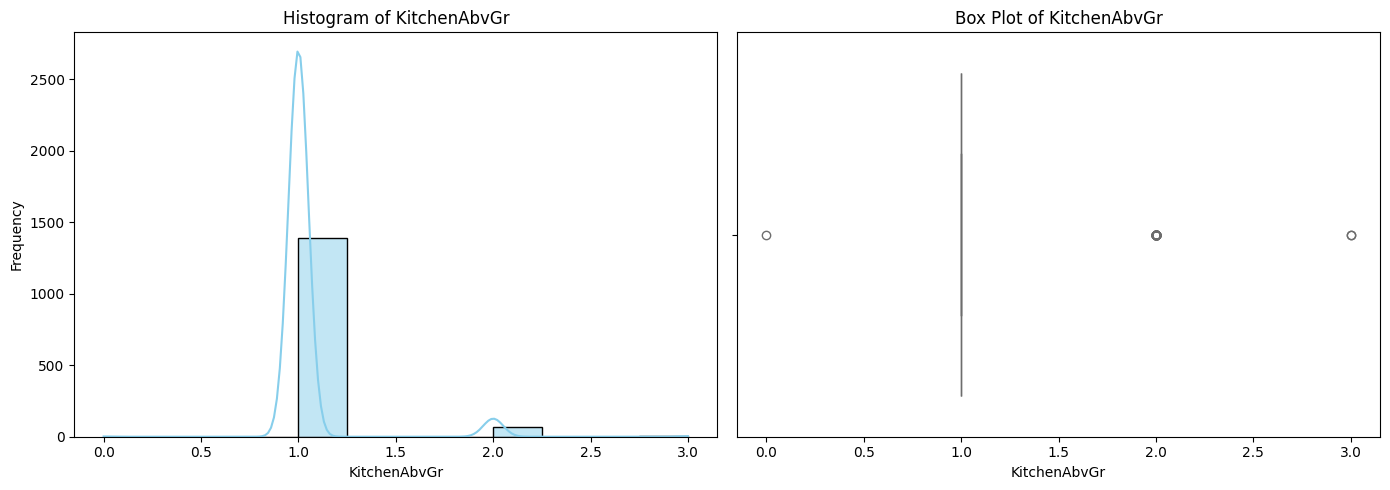


Summary statistics for KitchenAbvGr:
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64




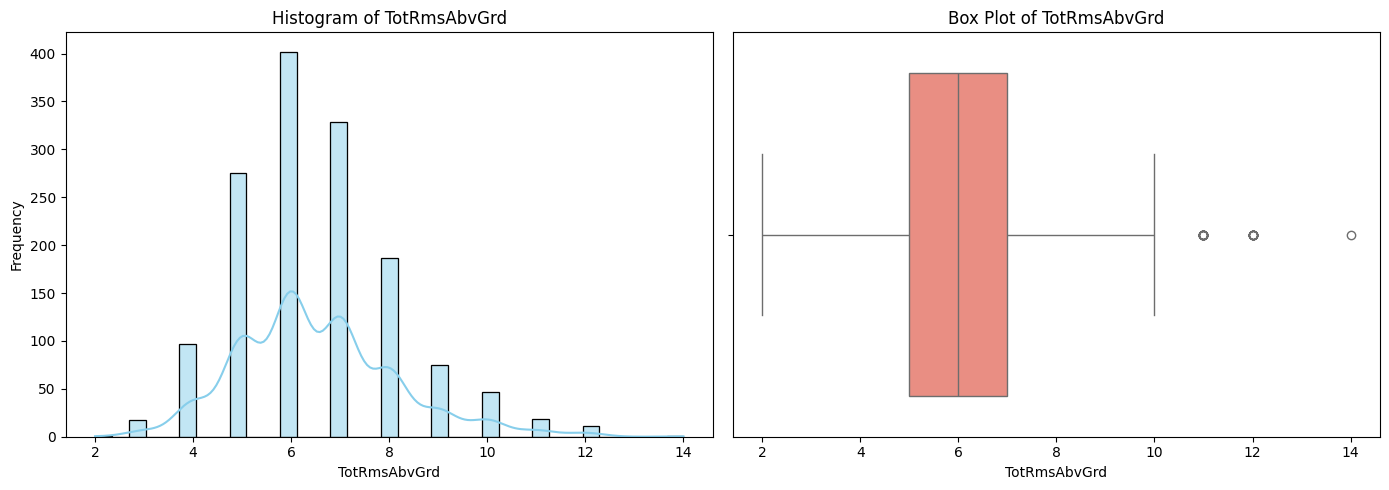


Summary statistics for TotRmsAbvGrd:
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64




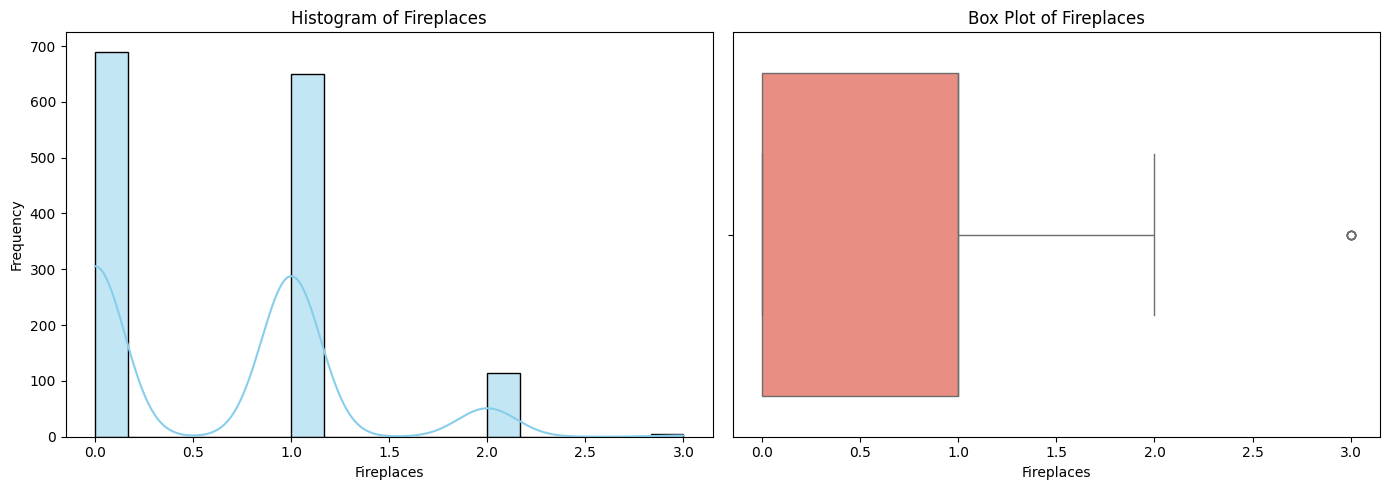


Summary statistics for Fireplaces:
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64




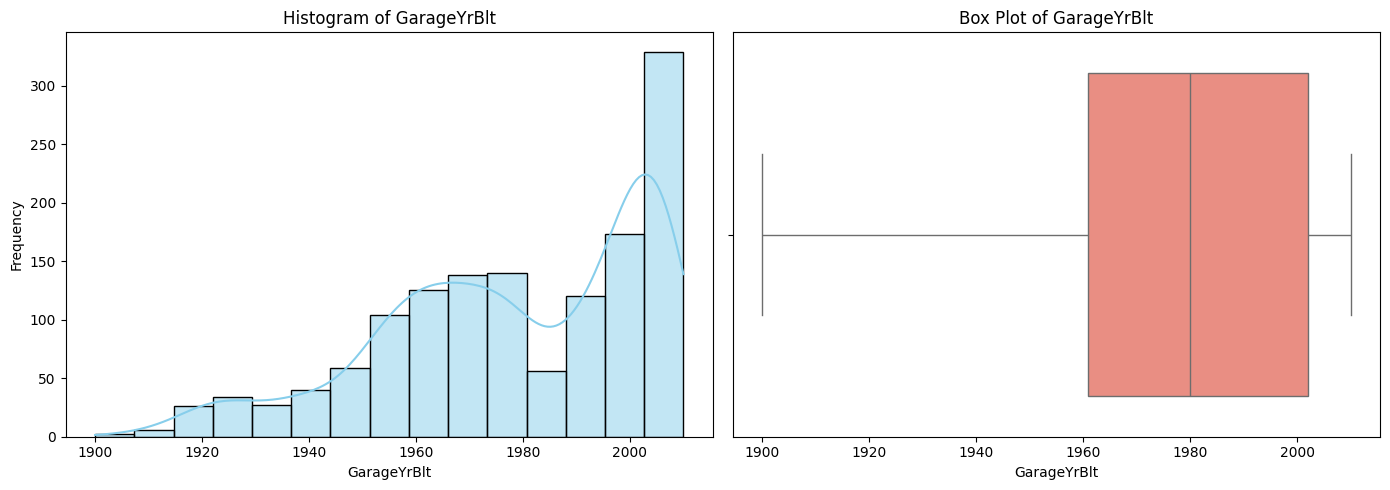


Summary statistics for GarageYrBlt:
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64




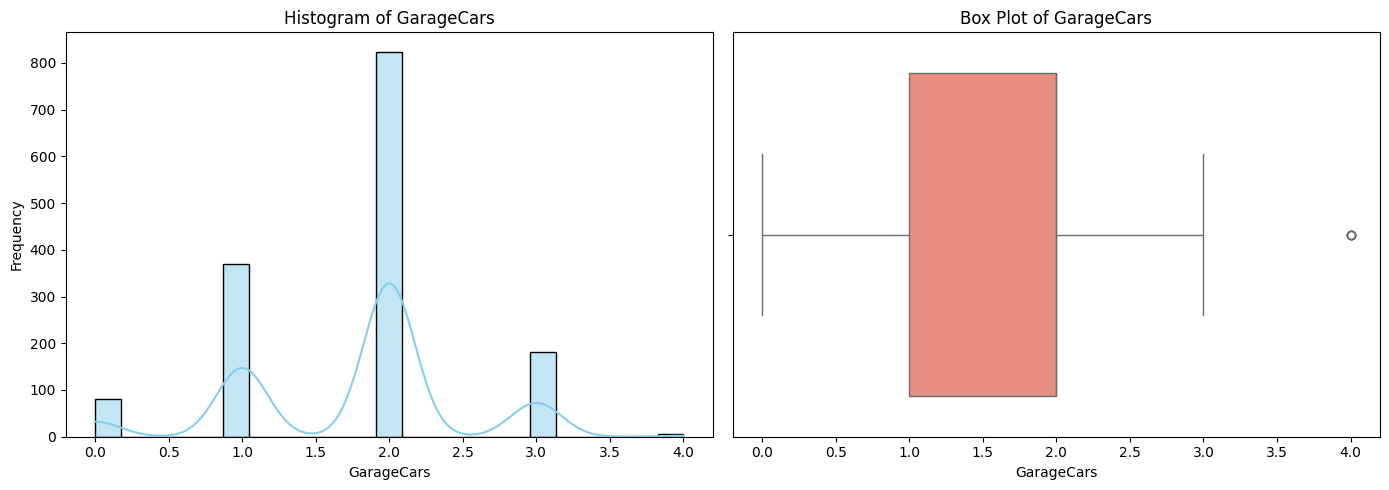


Summary statistics for GarageCars:
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64




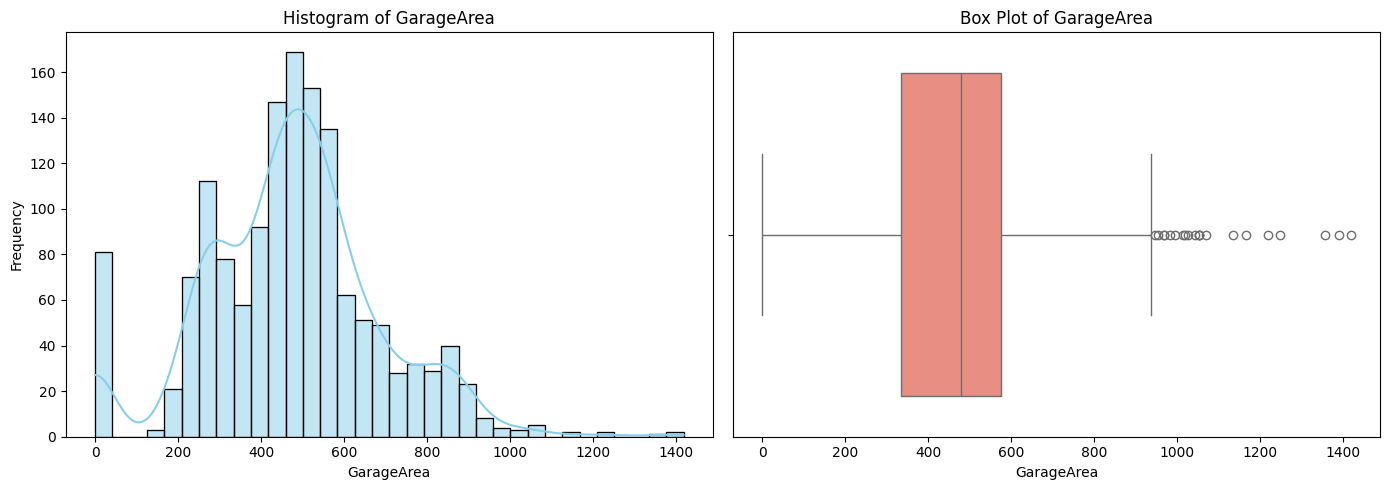


Summary statistics for GarageArea:
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64




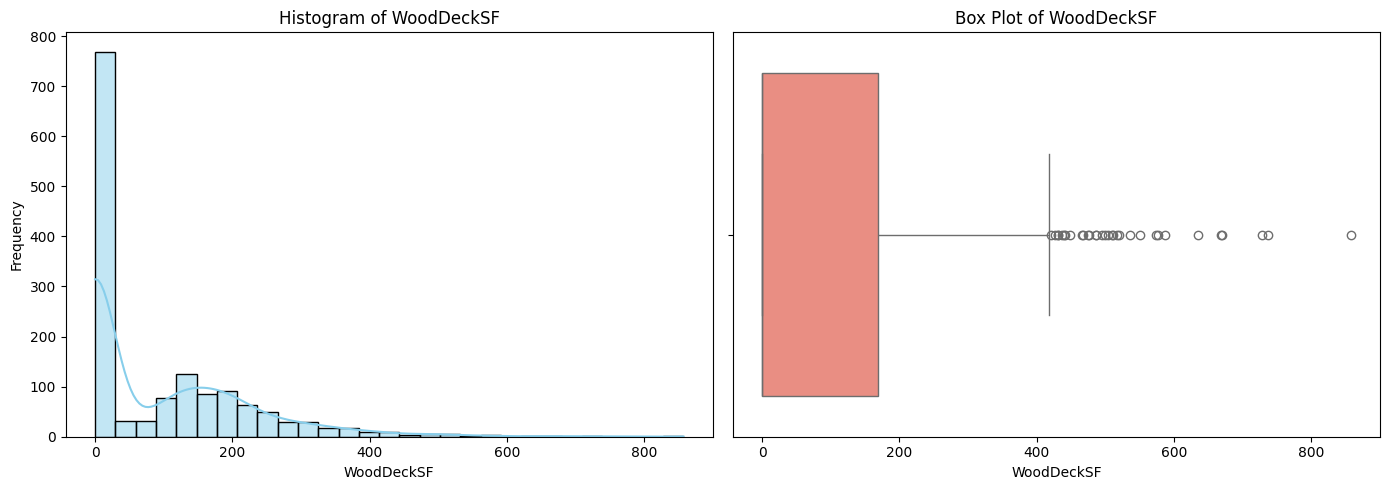


Summary statistics for WoodDeckSF:
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64




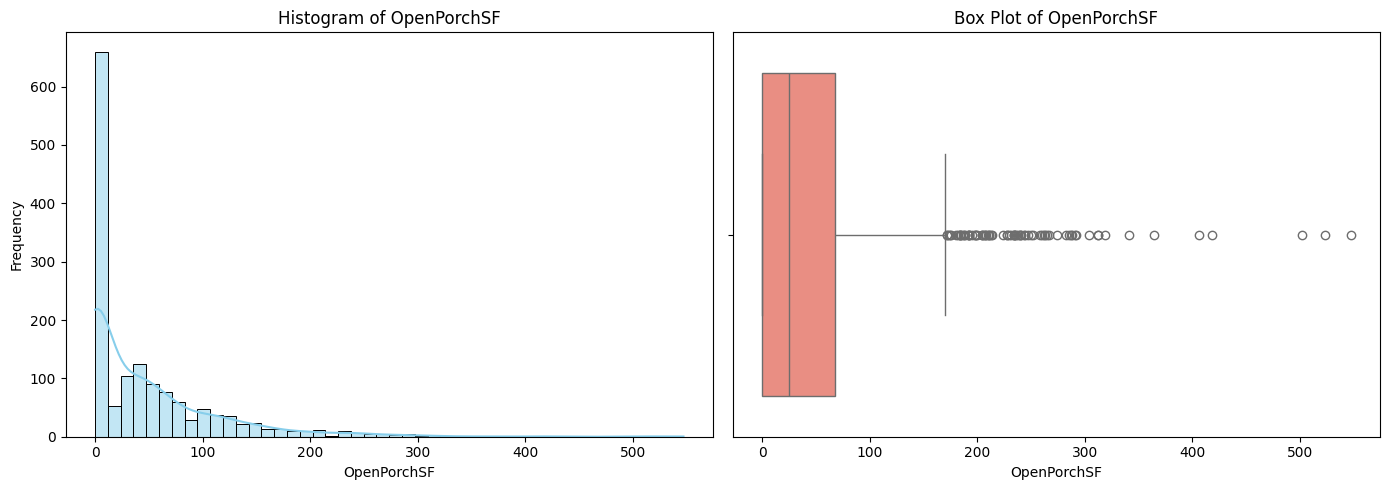


Summary statistics for OpenPorchSF:
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64




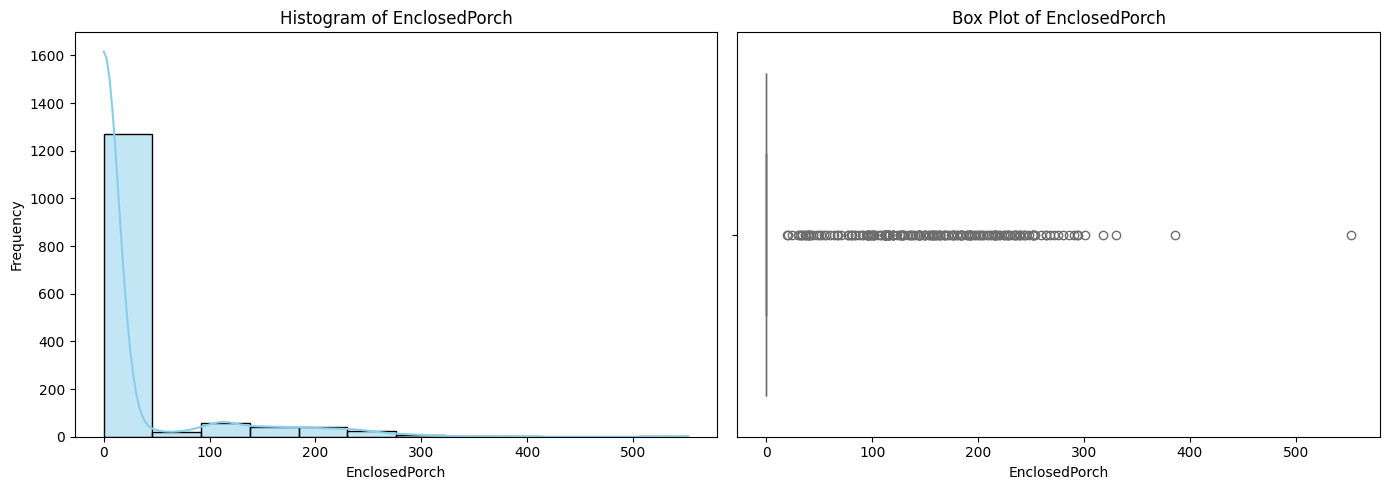


Summary statistics for EnclosedPorch:
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64




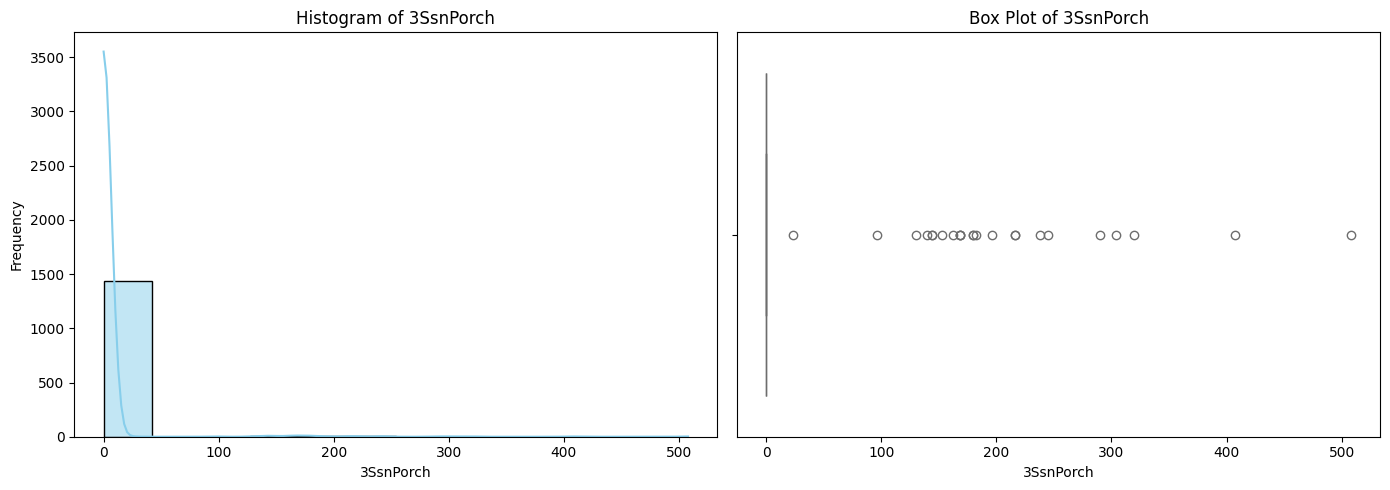


Summary statistics for 3SsnPorch:
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64




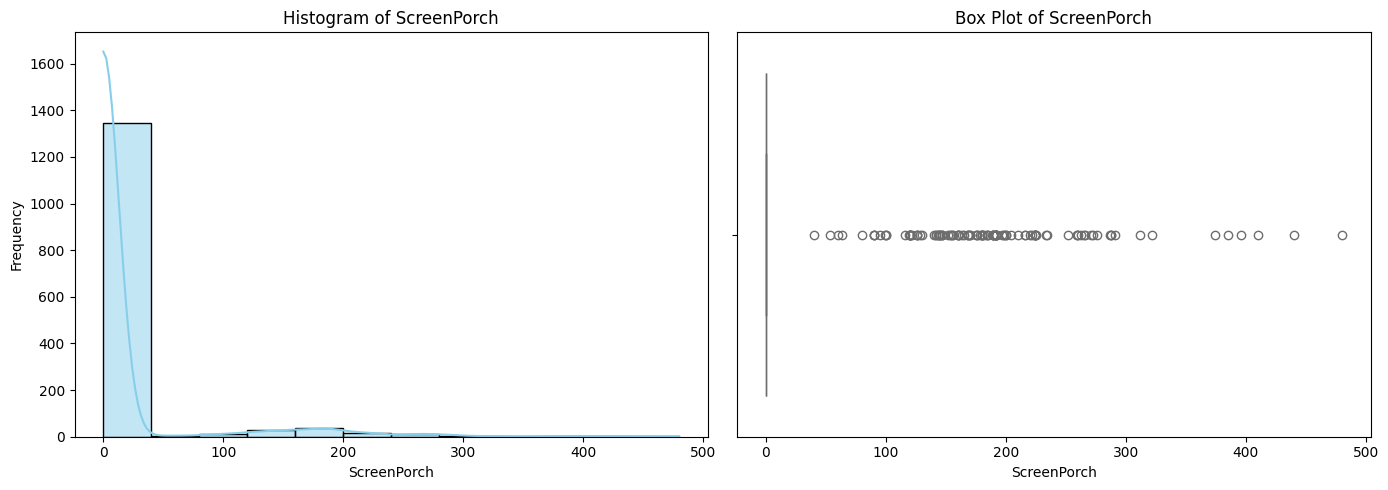


Summary statistics for ScreenPorch:
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64




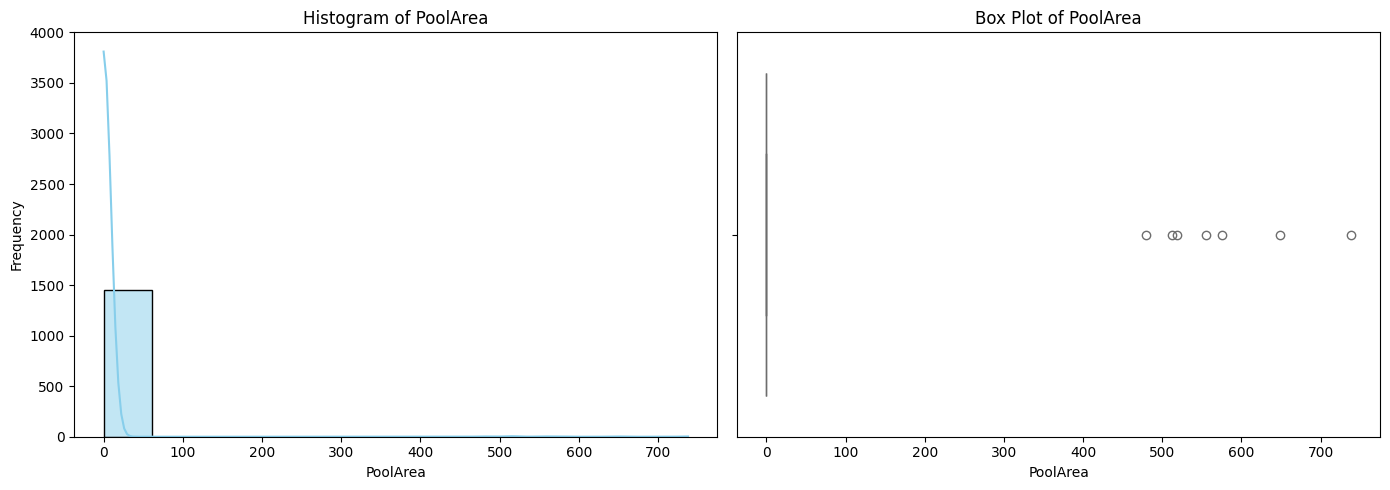


Summary statistics for PoolArea:
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64




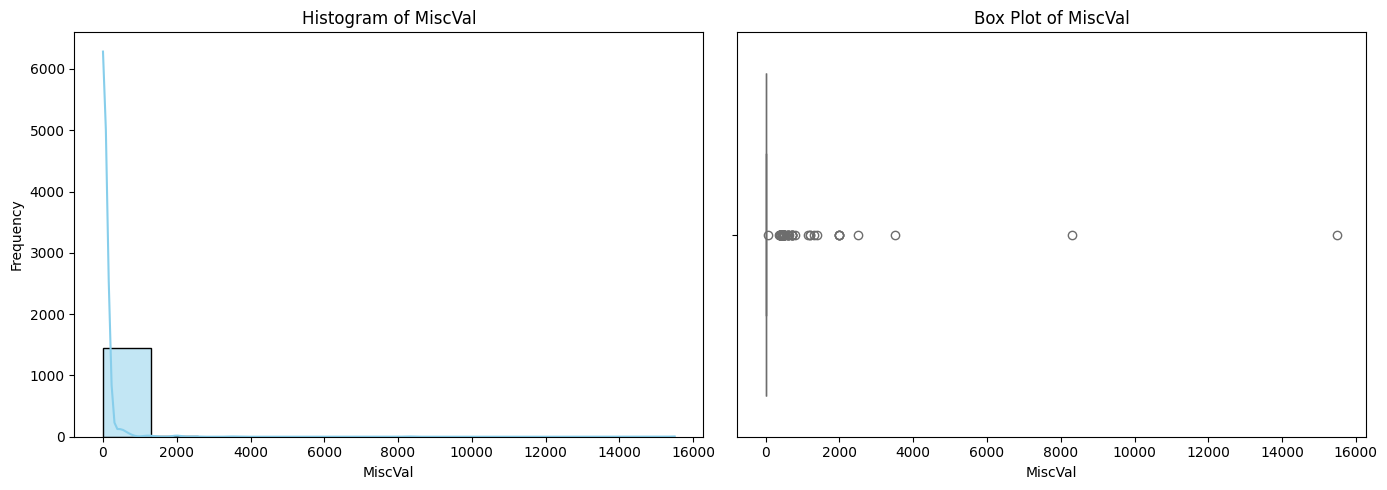


Summary statistics for MiscVal:
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64




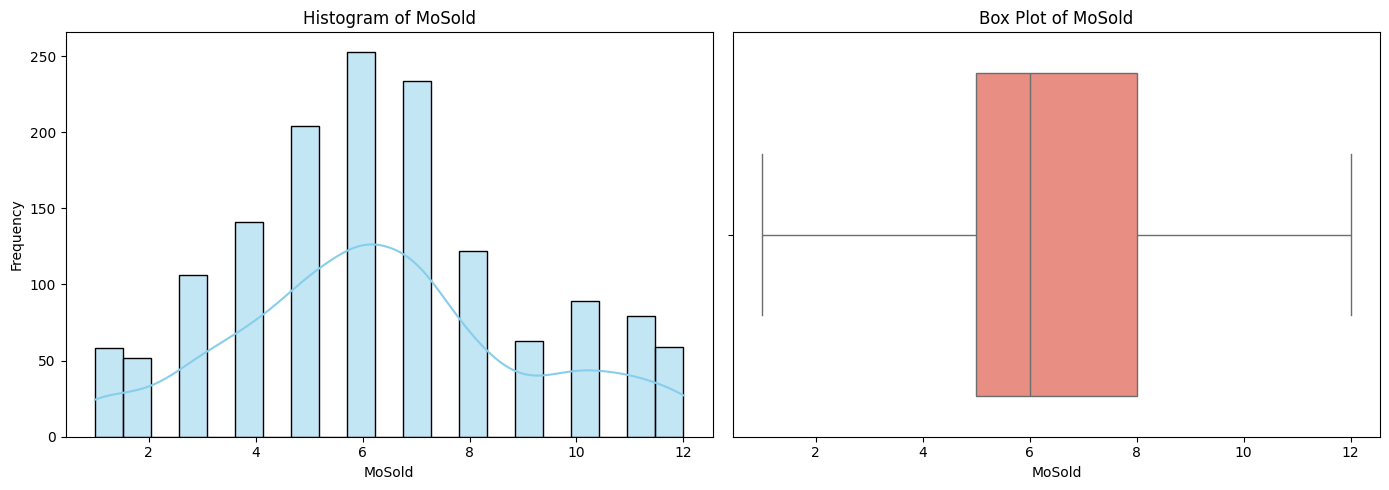


Summary statistics for MoSold:
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64




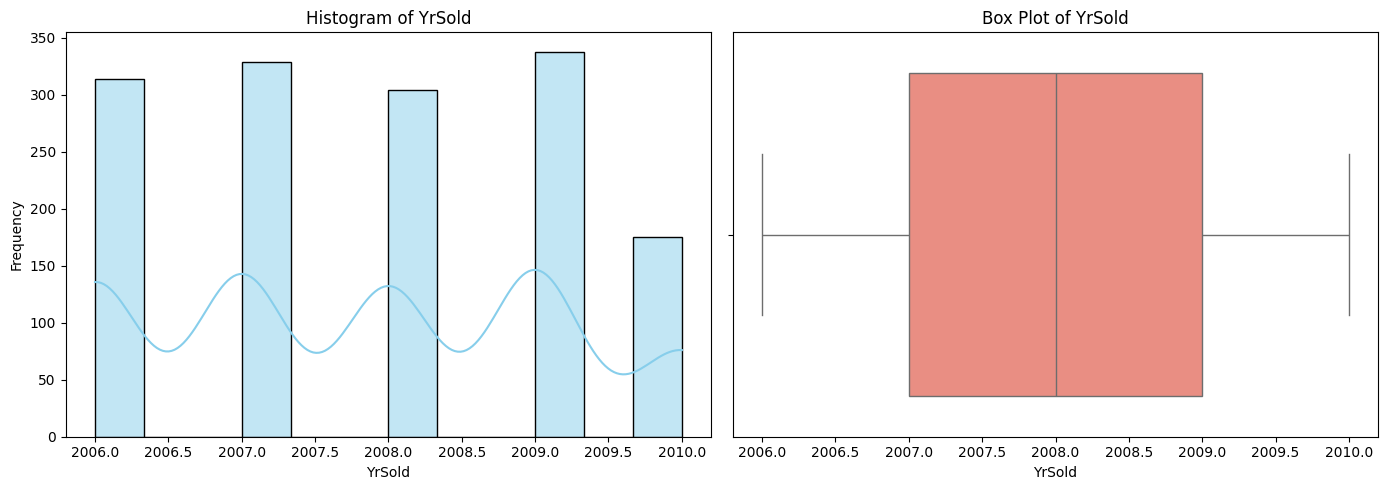


Summary statistics for YrSold:
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64




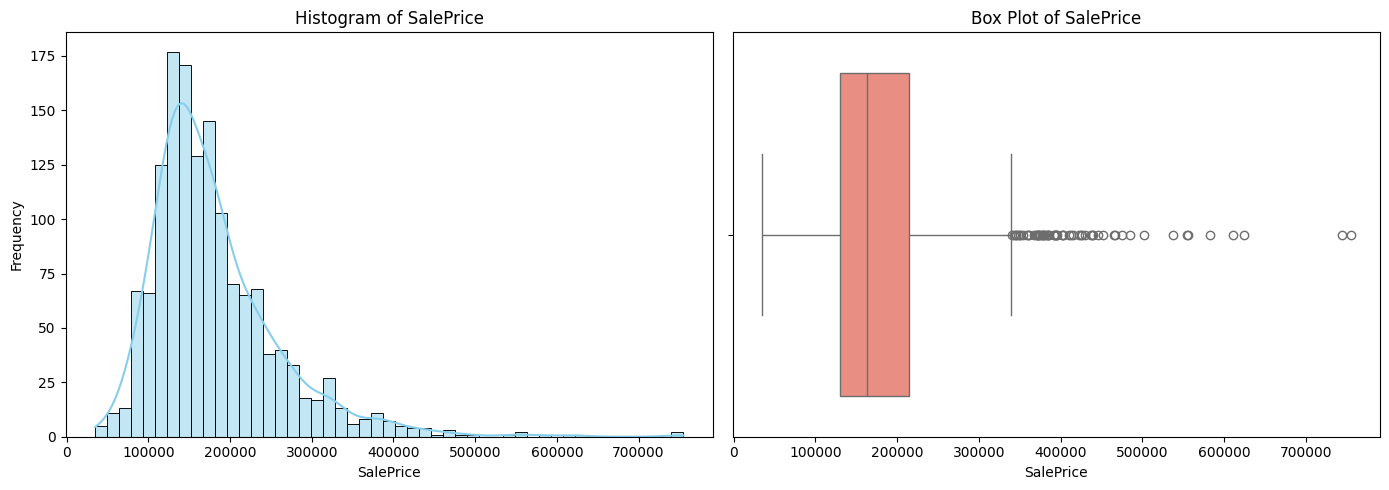


Summary statistics for SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64




In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms and box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print(f"\nSummary statistics for {column}:")
    print(df[column].describe())
    print("\n" + "="*50 + "\n")


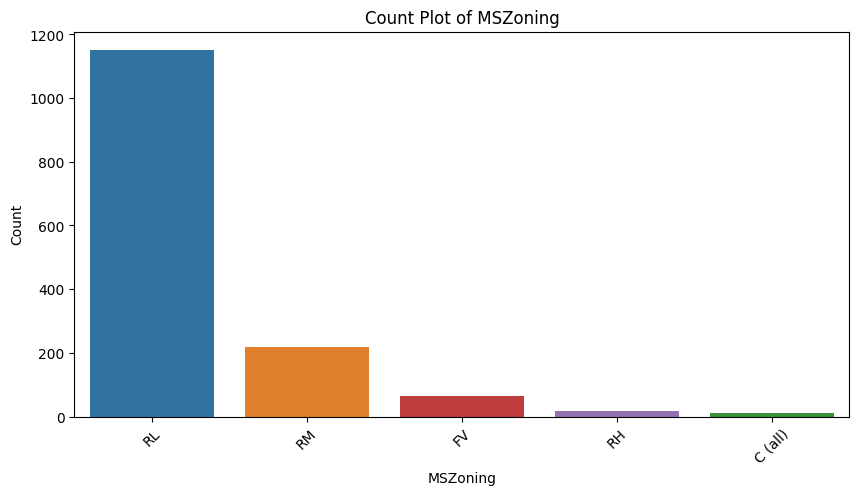


Value counts for MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64




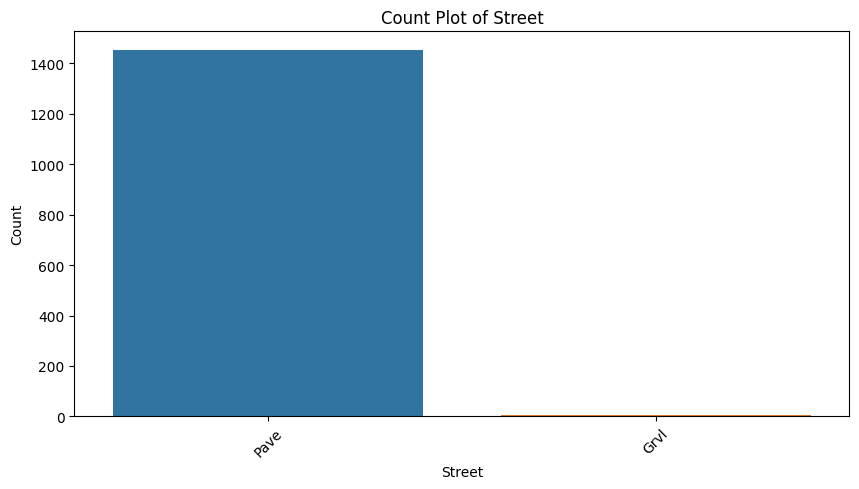


Value counts for Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64




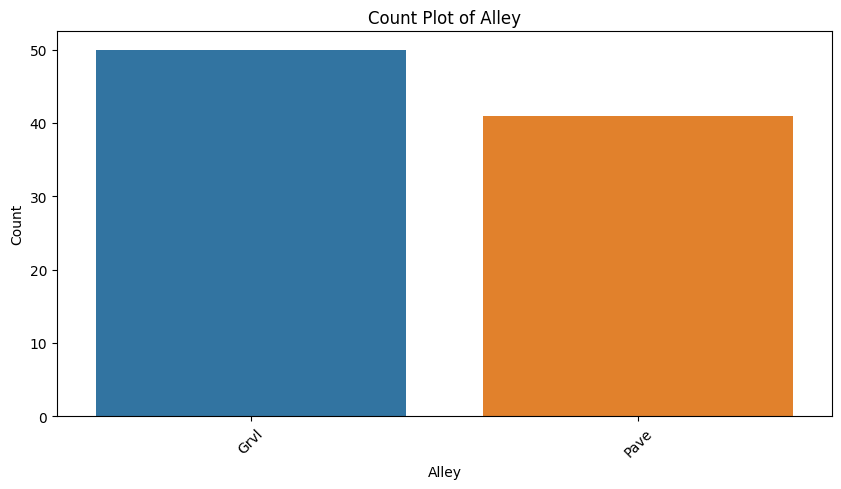


Value counts for Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64




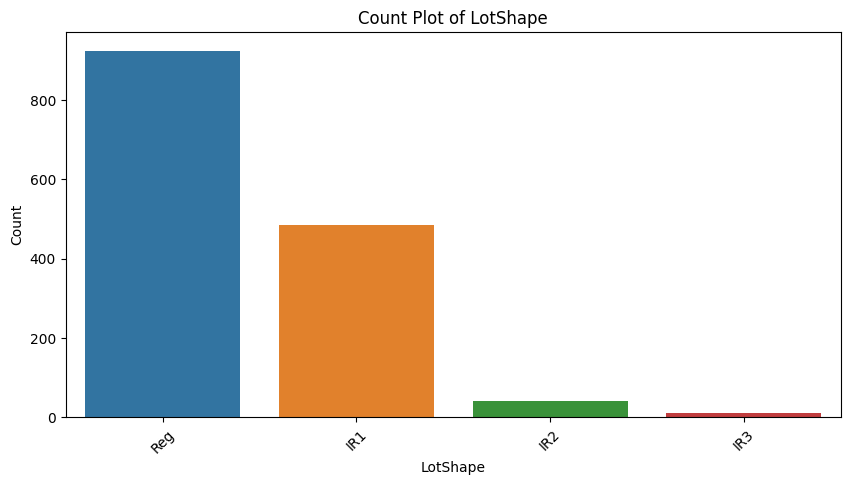


Value counts for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64




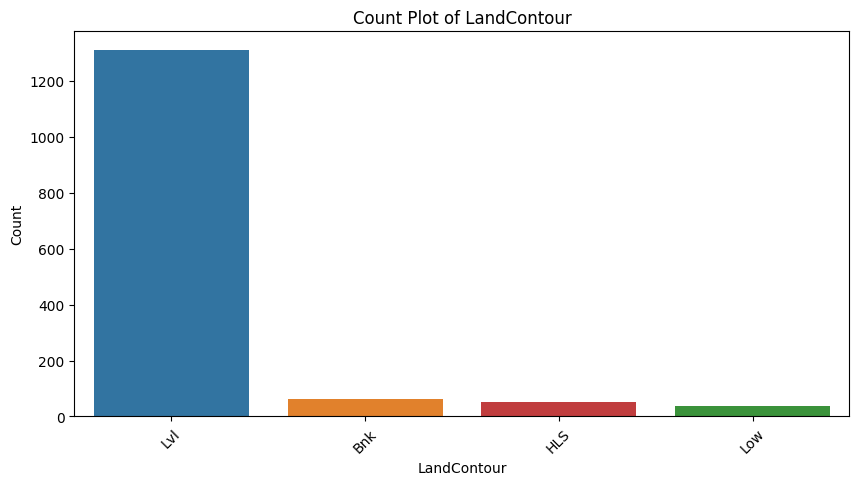


Value counts for LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64




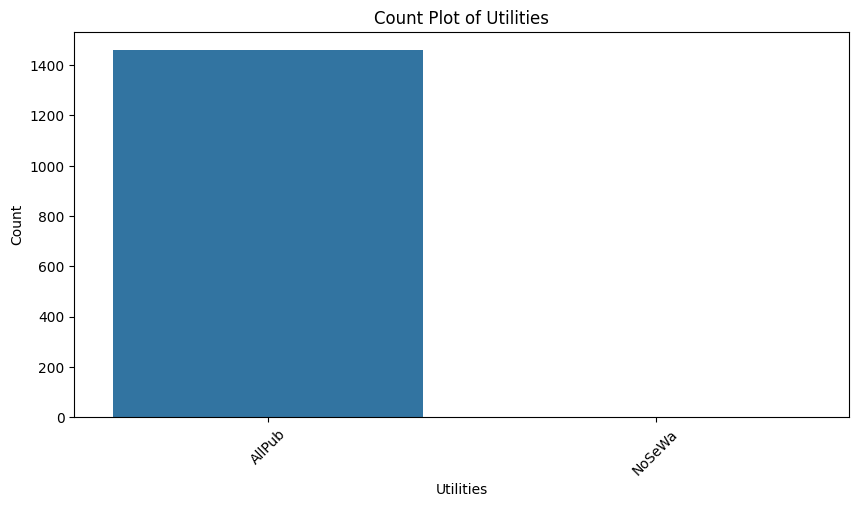


Value counts for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64




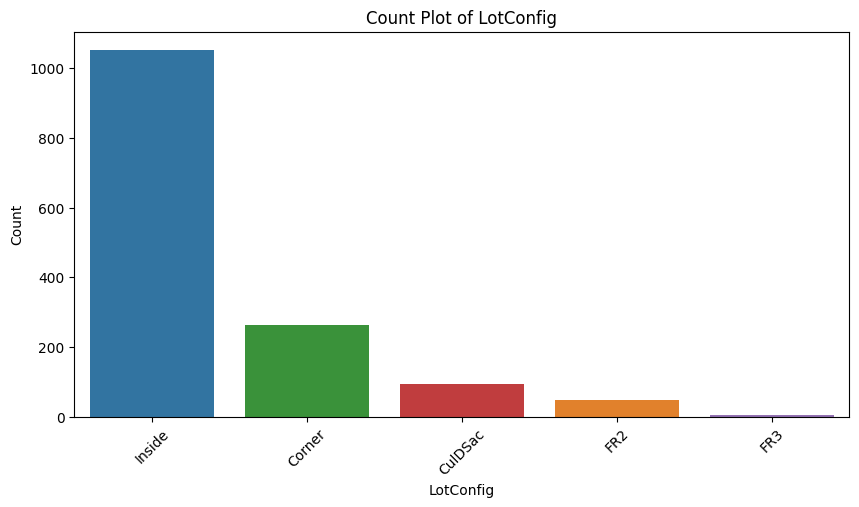


Value counts for LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64




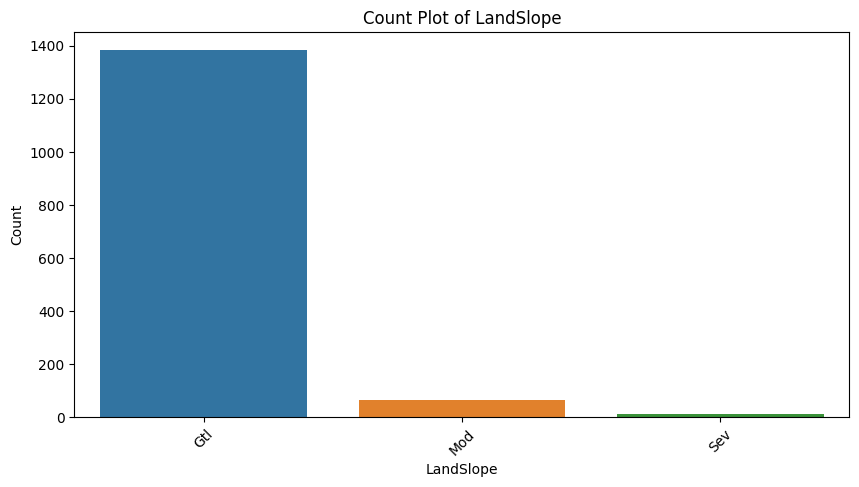


Value counts for LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64




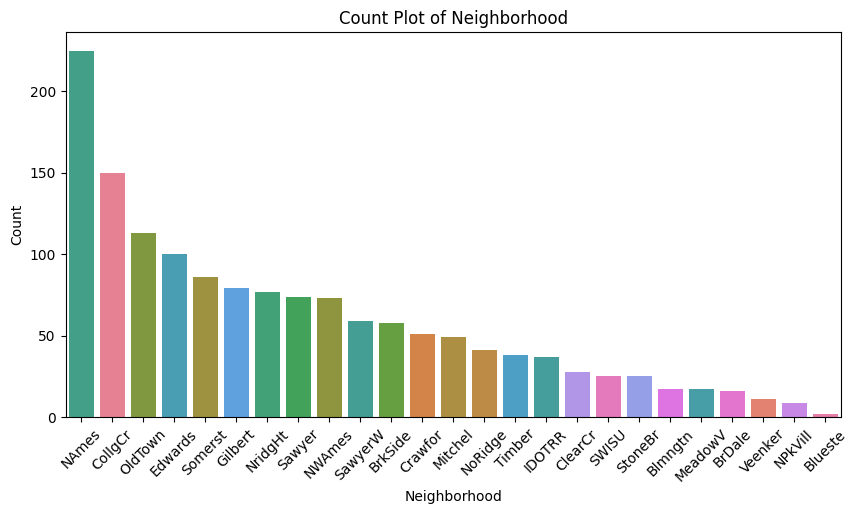


Value counts for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64




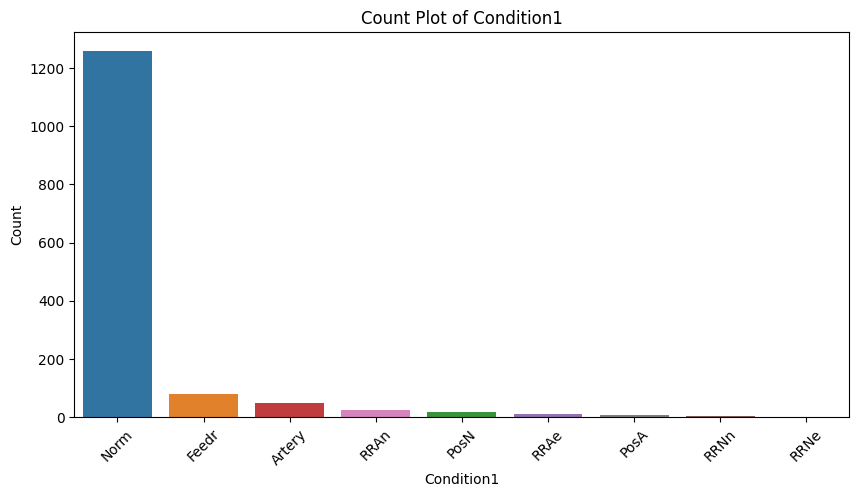


Value counts for Condition1:
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64




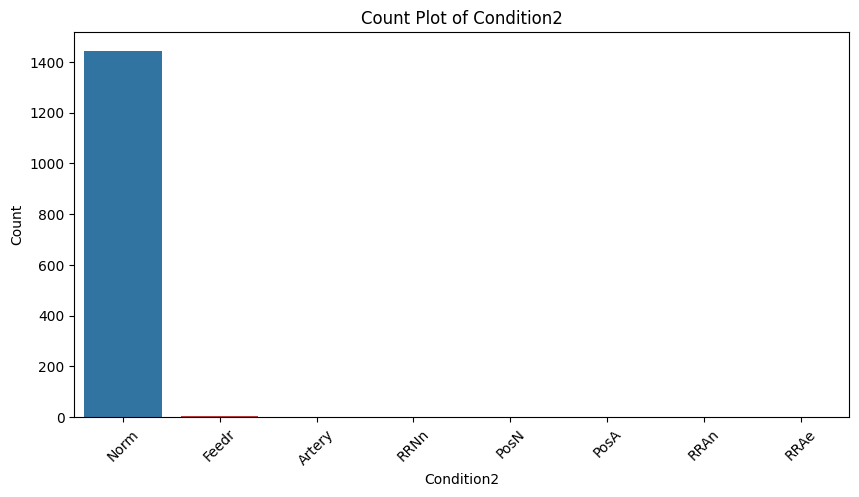


Value counts for Condition2:
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64




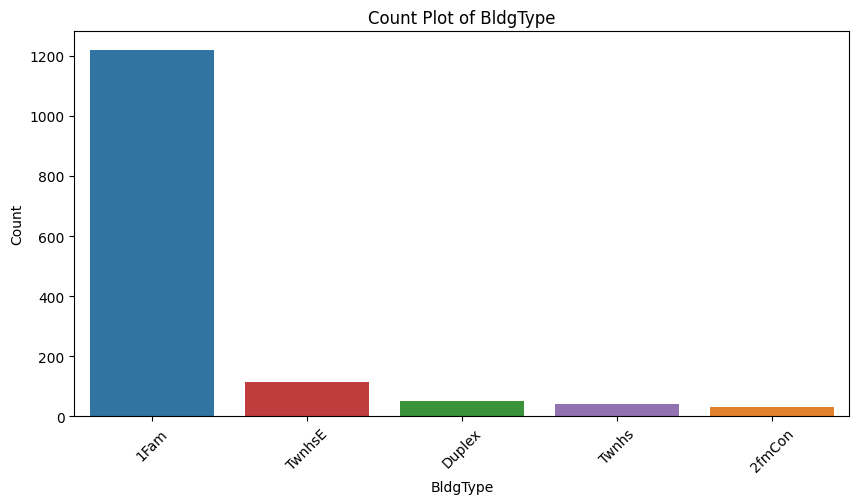


Value counts for BldgType:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64




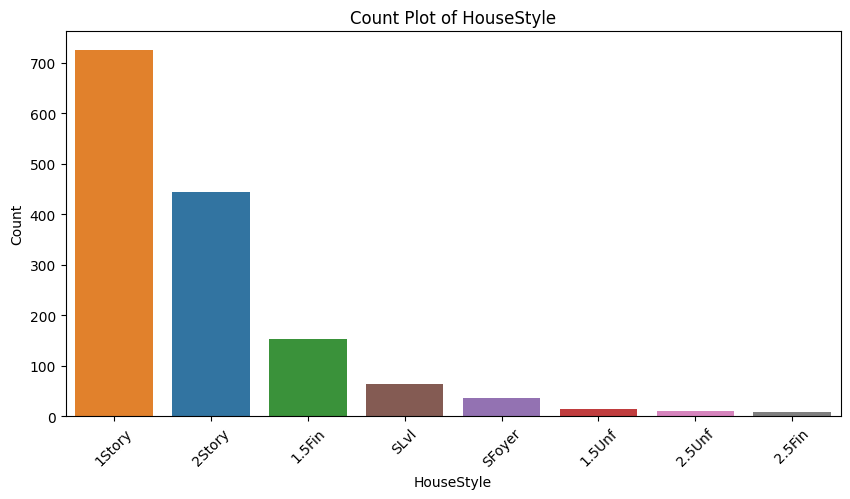


Value counts for HouseStyle:
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64




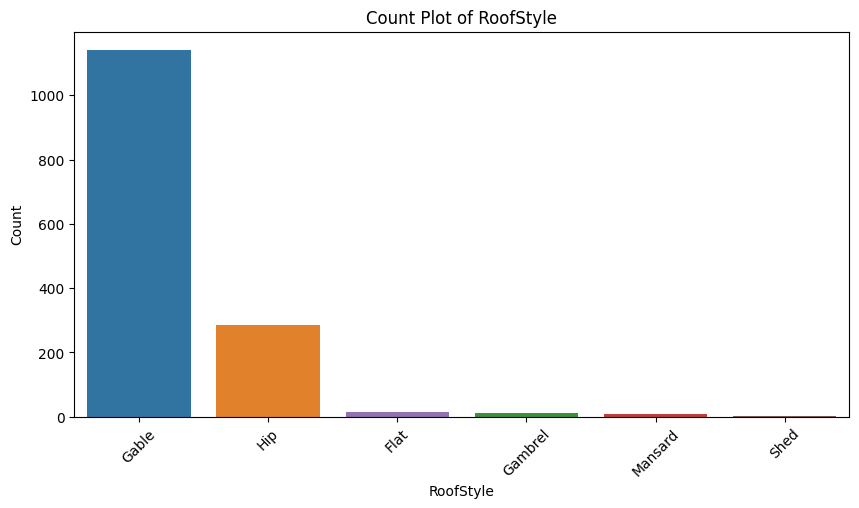


Value counts for RoofStyle:
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64




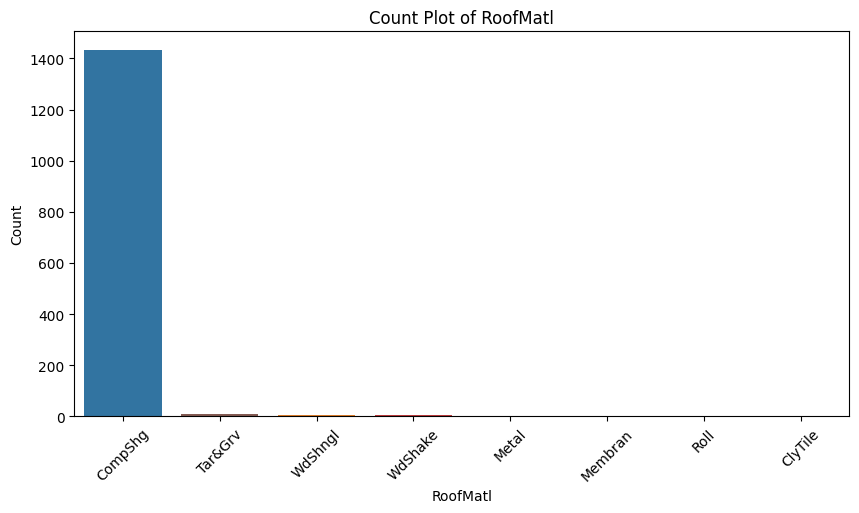


Value counts for RoofMatl:
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64




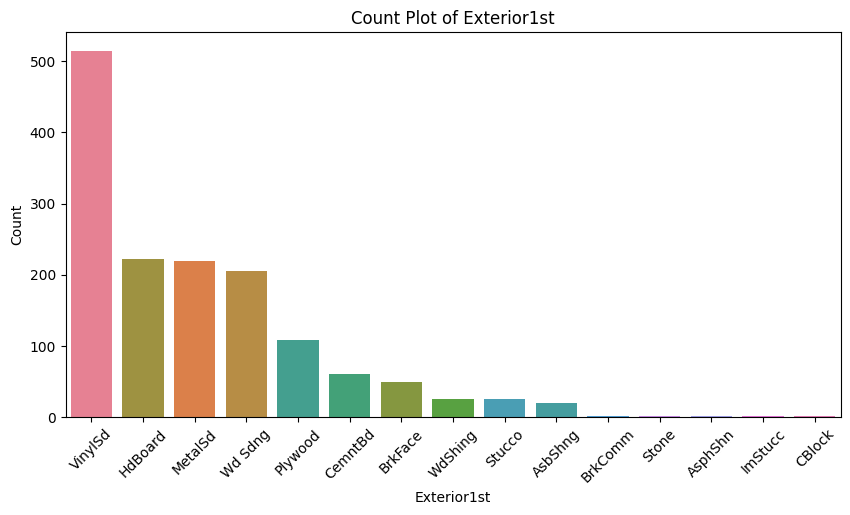


Value counts for Exterior1st:
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64




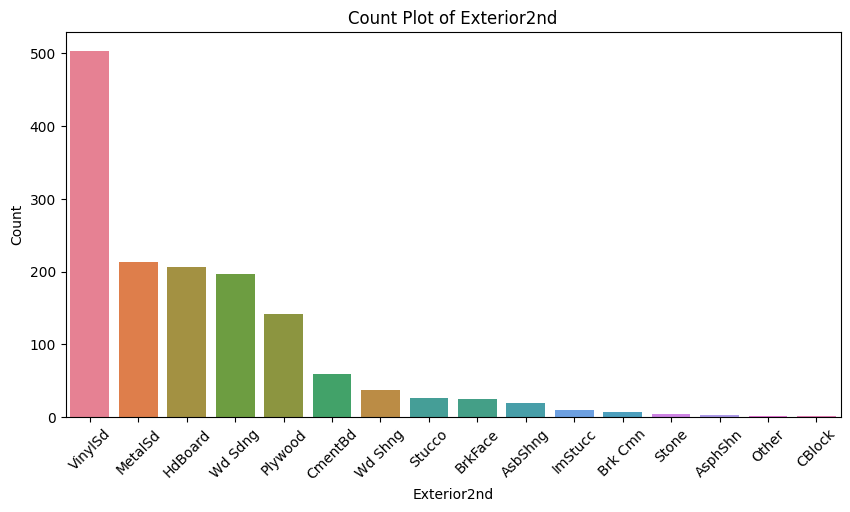


Value counts for Exterior2nd:
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64




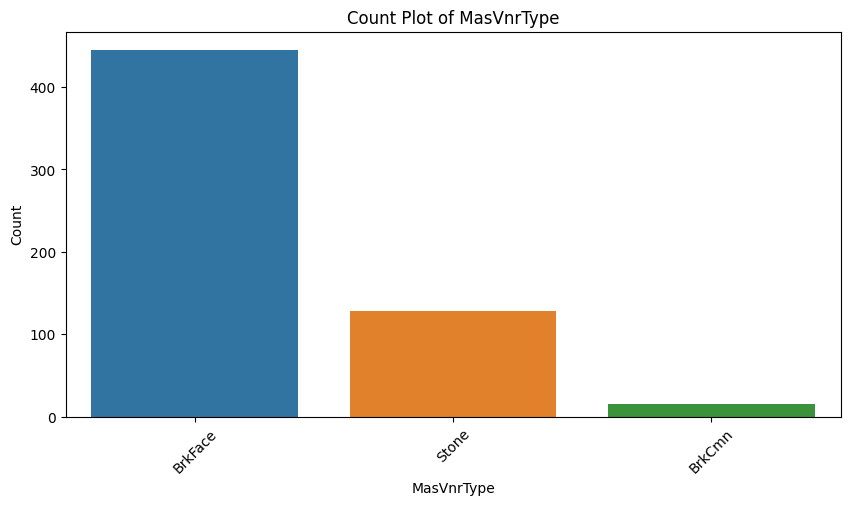


Value counts for MasVnrType:
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64




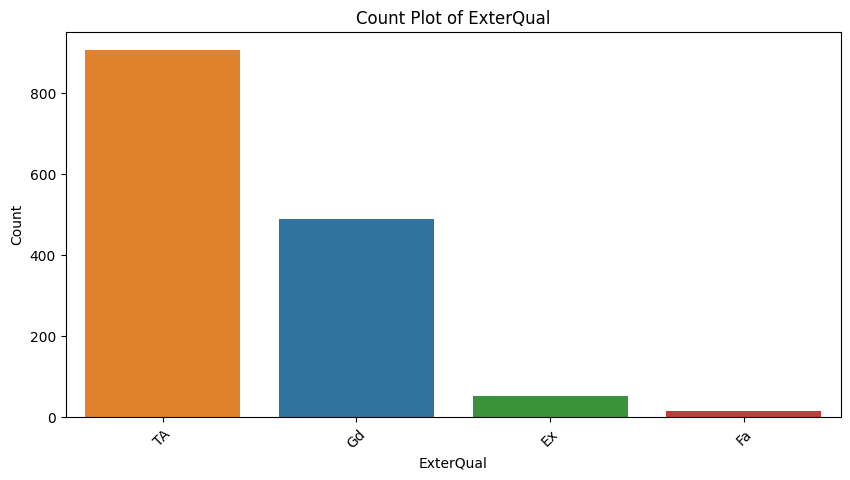


Value counts for ExterQual:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64




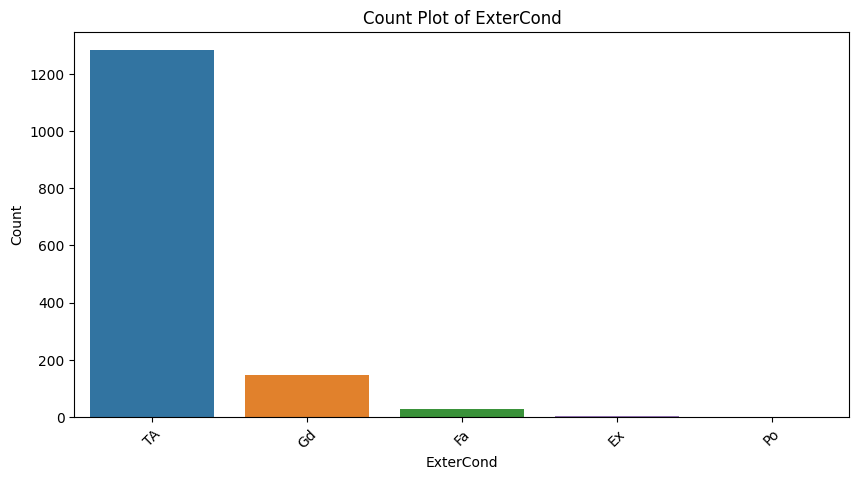


Value counts for ExterCond:
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64




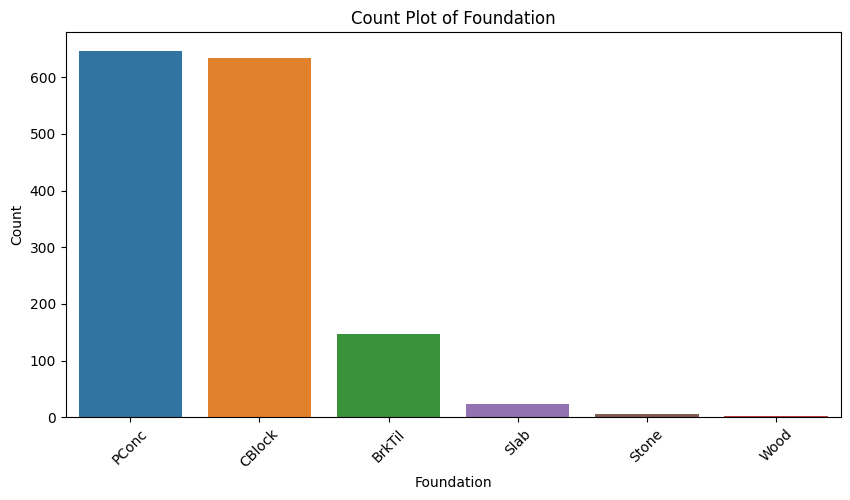


Value counts for Foundation:
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64




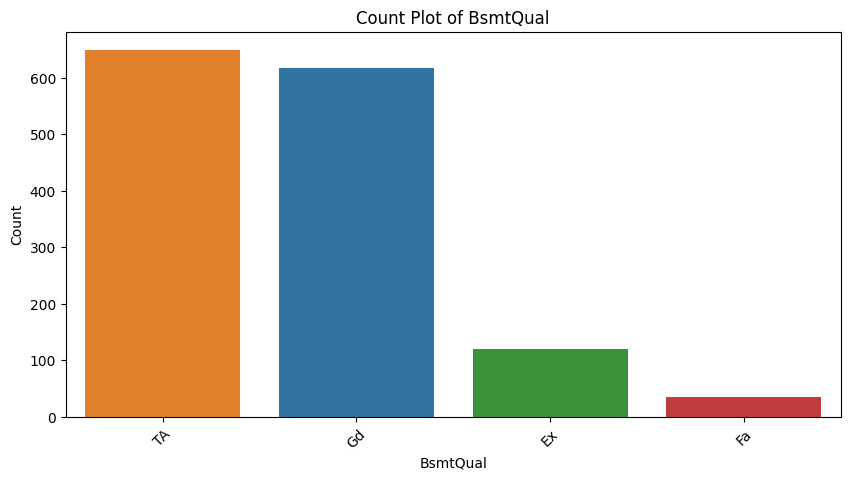


Value counts for BsmtQual:
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64




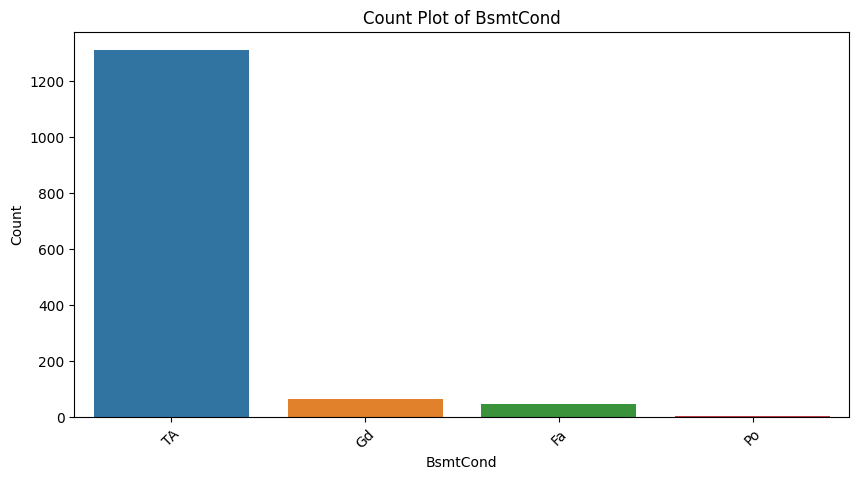


Value counts for BsmtCond:
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64




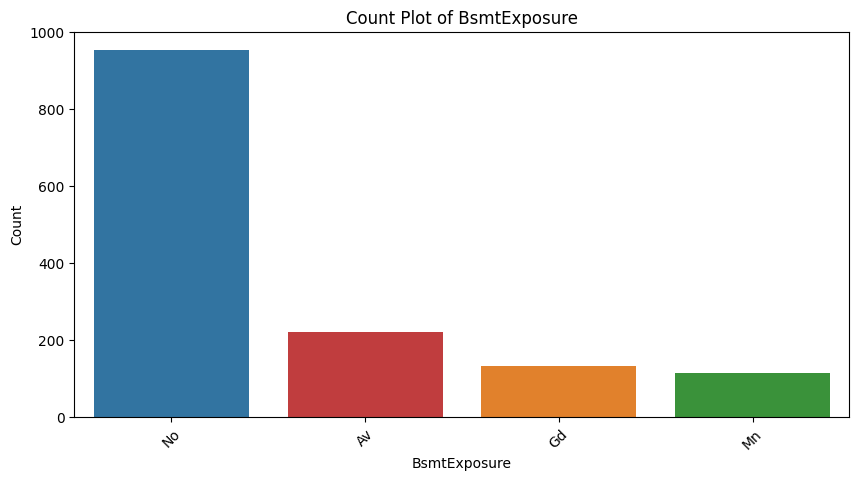


Value counts for BsmtExposure:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64




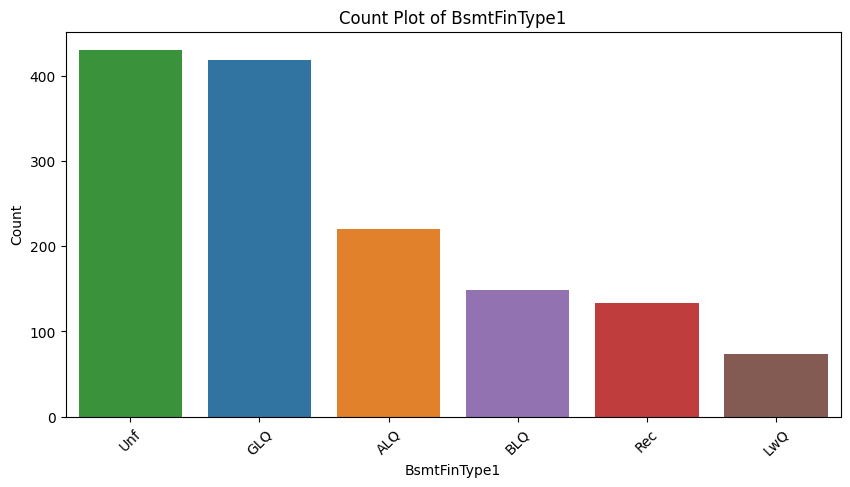


Value counts for BsmtFinType1:
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64




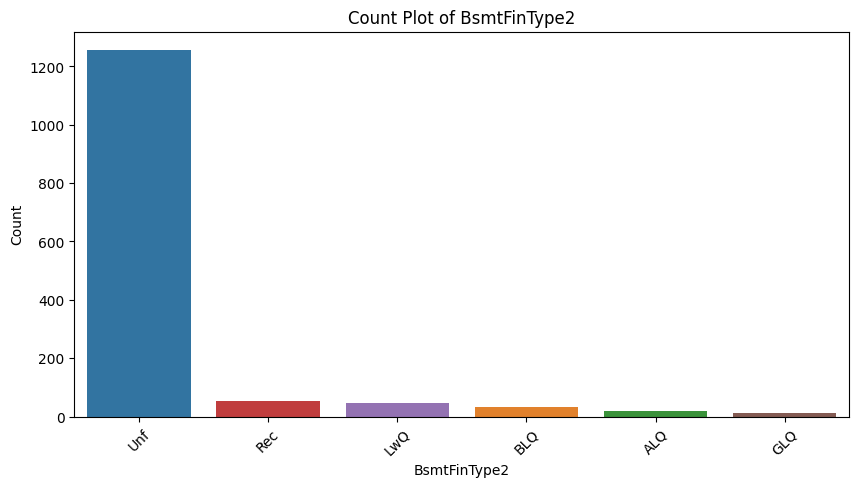


Value counts for BsmtFinType2:
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64




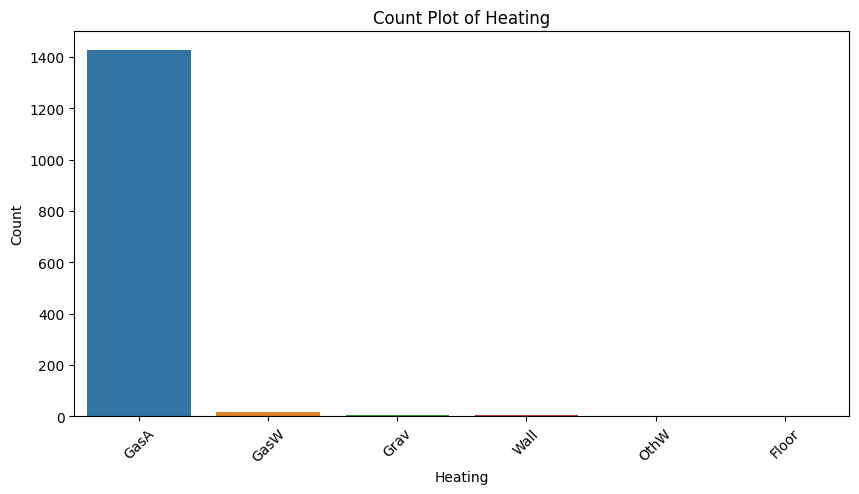


Value counts for Heating:
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64




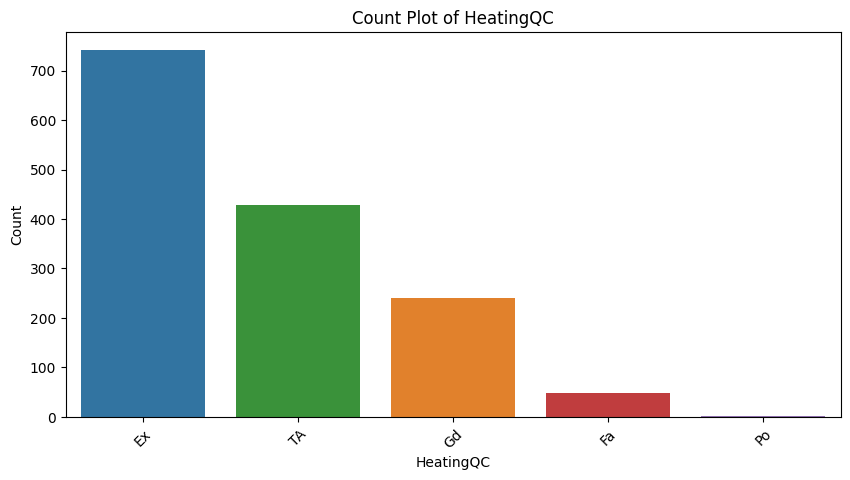


Value counts for HeatingQC:
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64




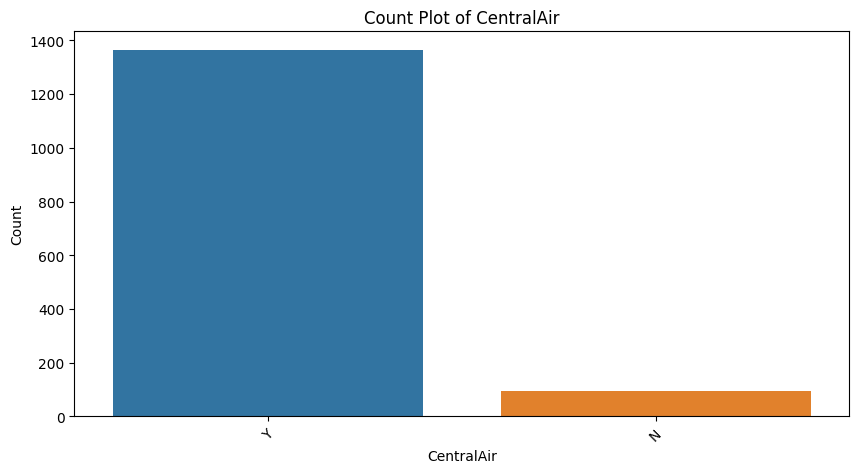


Value counts for CentralAir:
CentralAir
Y    1365
N      95
Name: count, dtype: int64




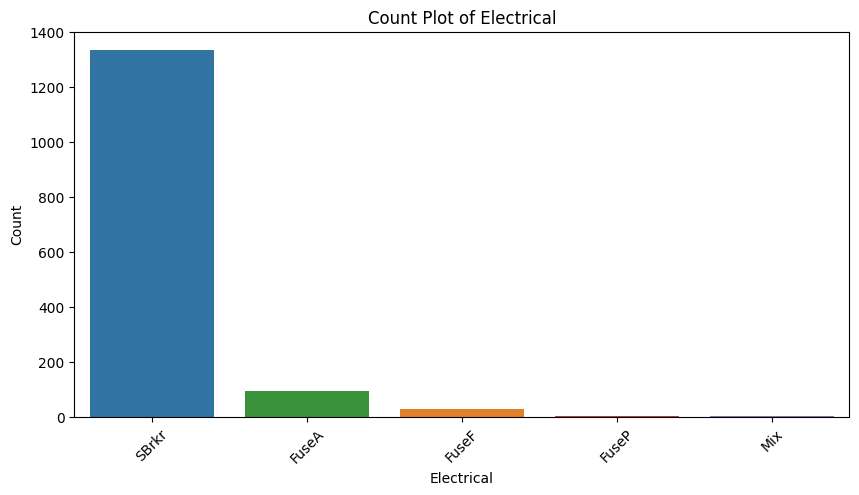


Value counts for Electrical:
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64




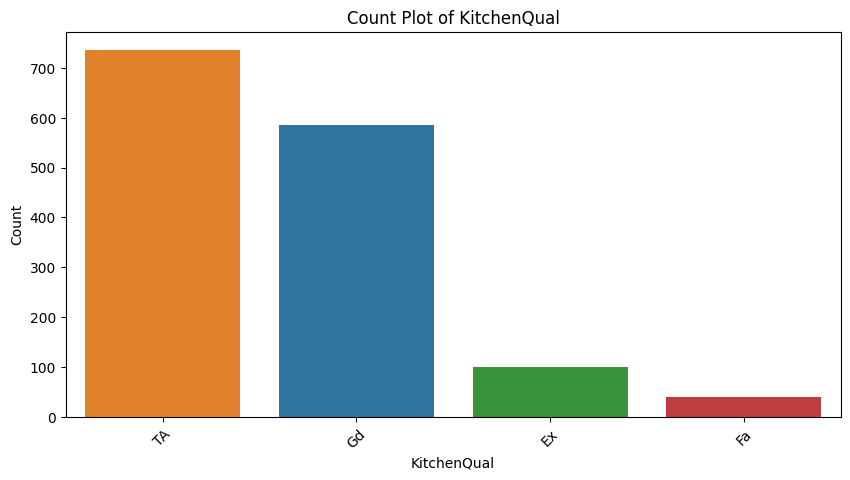


Value counts for KitchenQual:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64




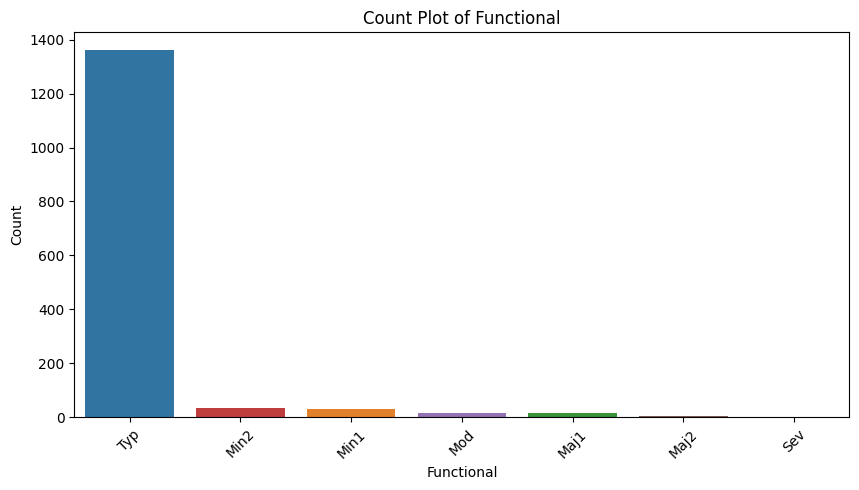


Value counts for Functional:
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64




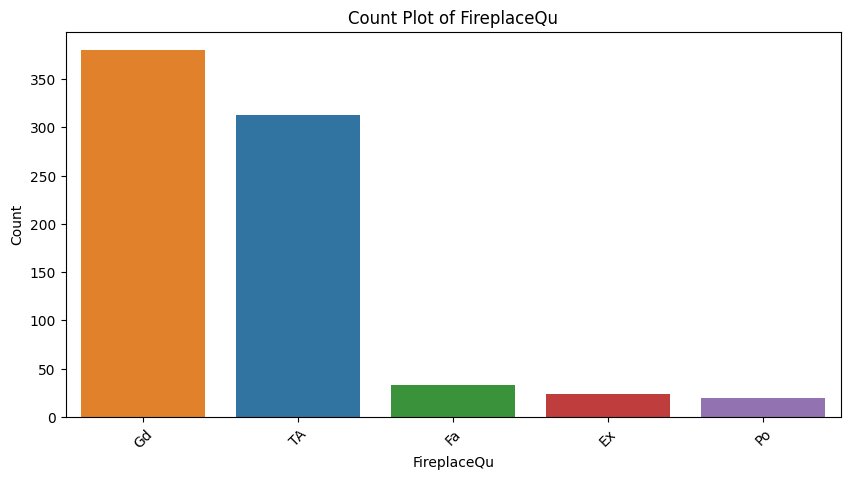


Value counts for FireplaceQu:
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64




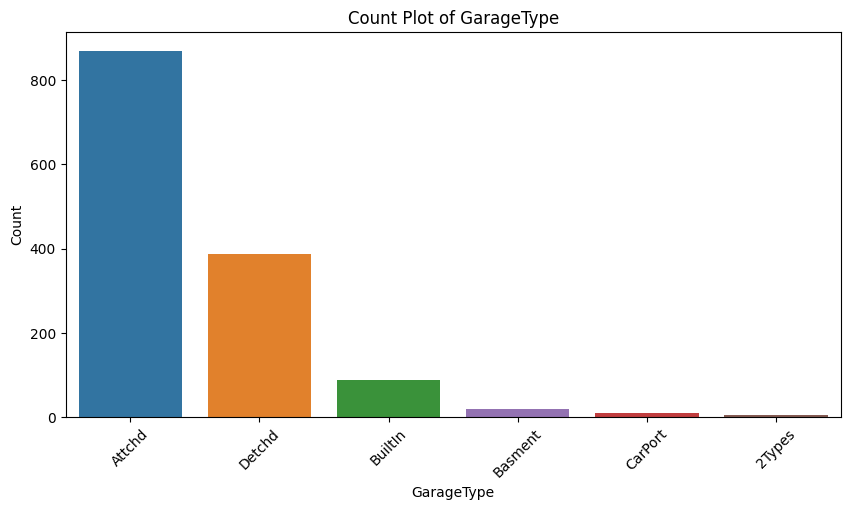


Value counts for GarageType:
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64




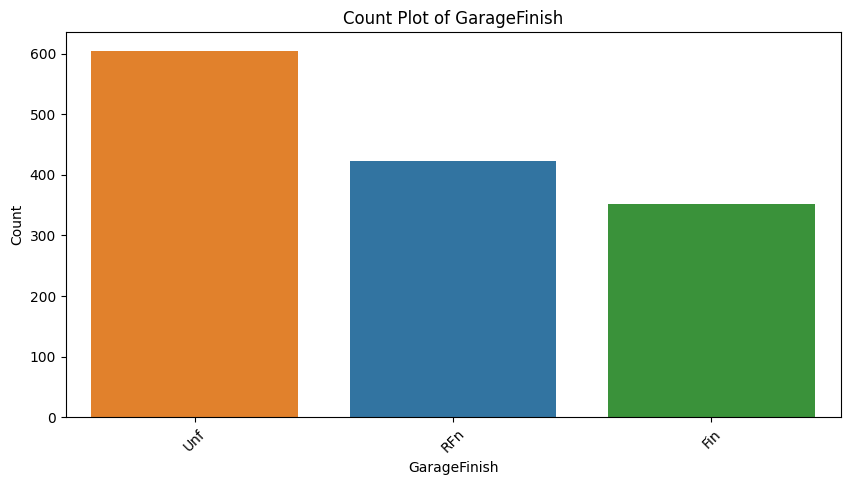


Value counts for GarageFinish:
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64




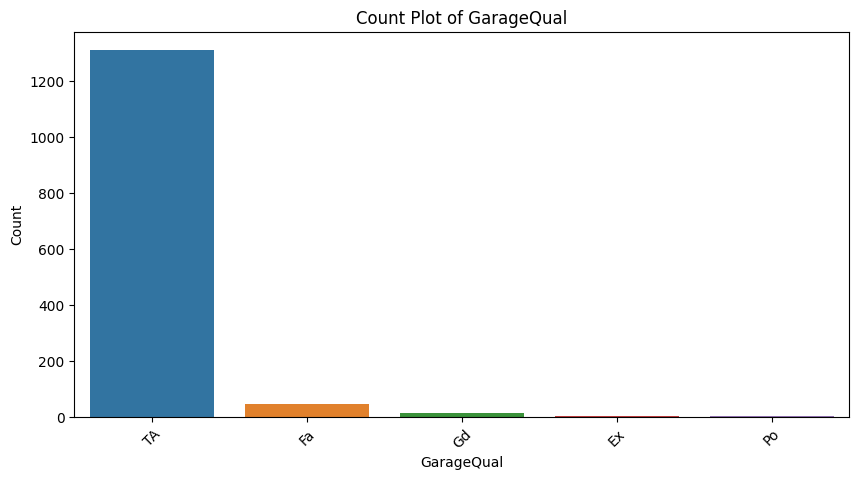


Value counts for GarageQual:
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64




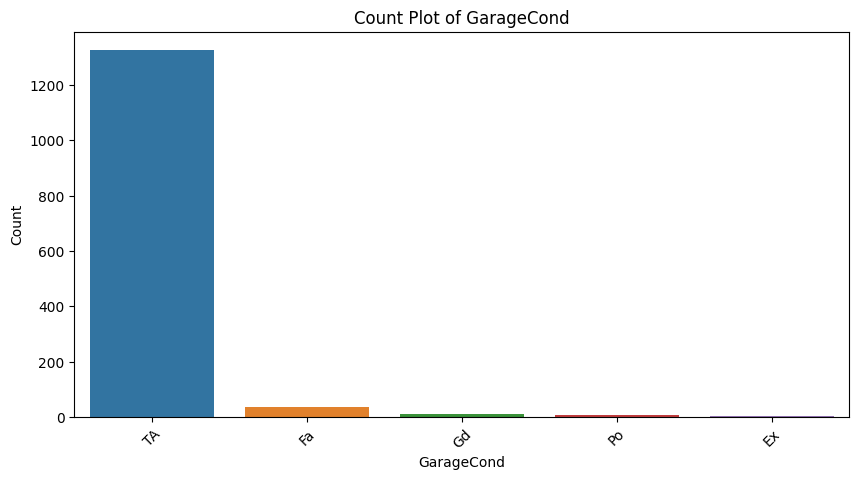


Value counts for GarageCond:
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64




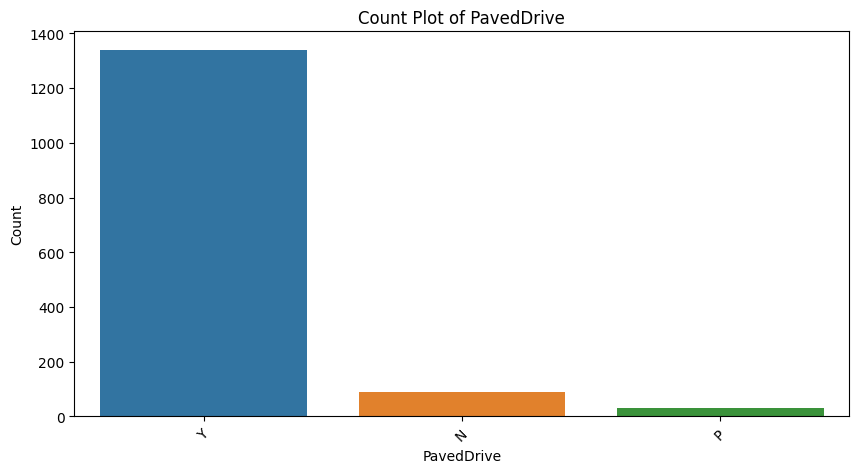


Value counts for PavedDrive:
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64




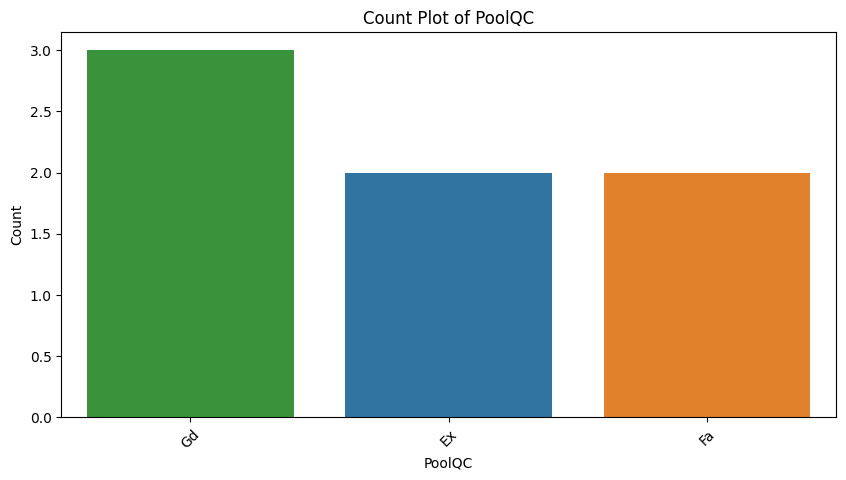


Value counts for PoolQC:
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64




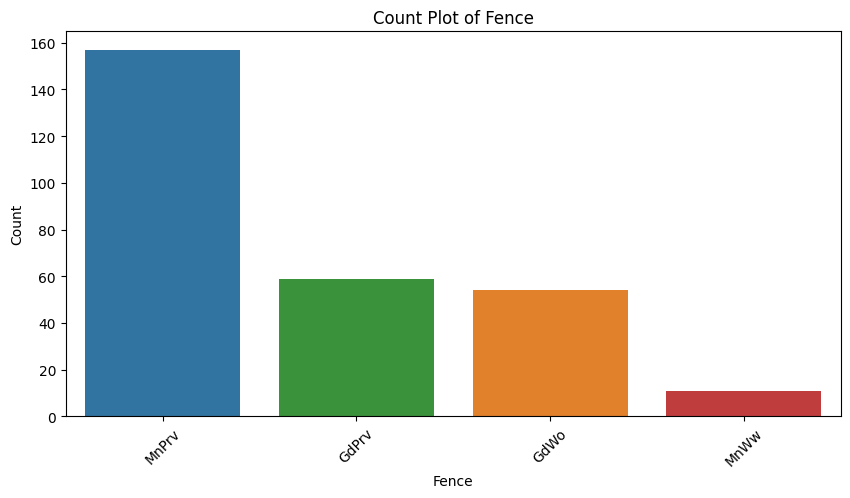


Value counts for Fence:
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64




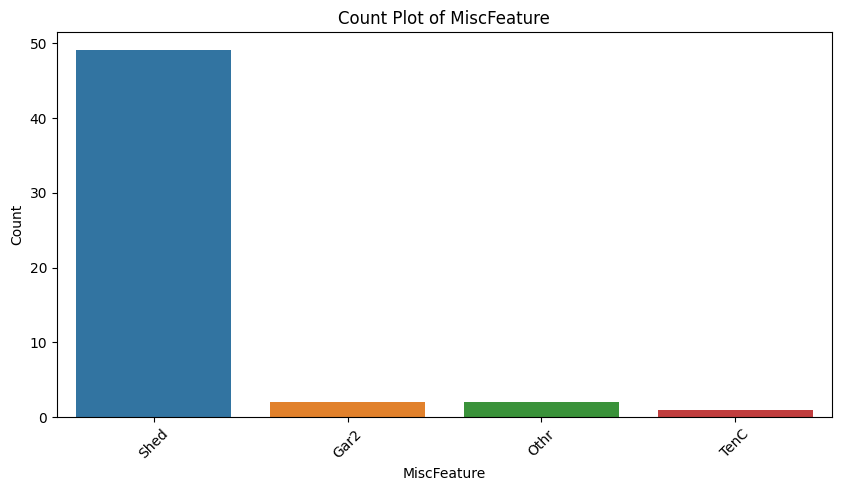


Value counts for MiscFeature:
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64




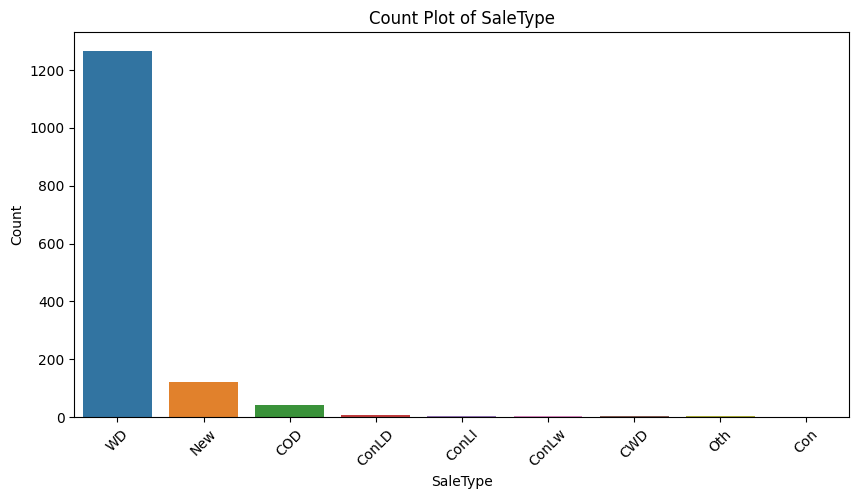


Value counts for SaleType:
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64




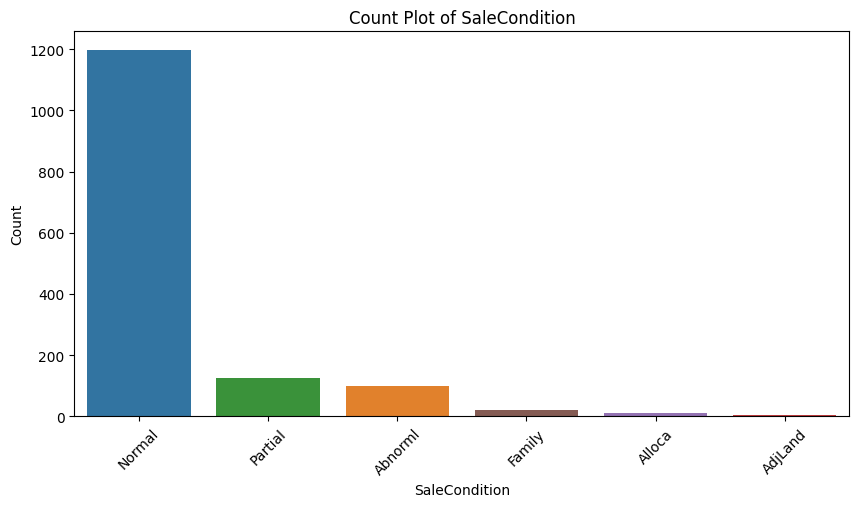


Value counts for SaleCondition:
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64




In [14]:
# Plot bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, hue=column, dodge=False, order=df[column].value_counts().index, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

    # Value counts
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())
    print("\n" + "="*50 + "\n")

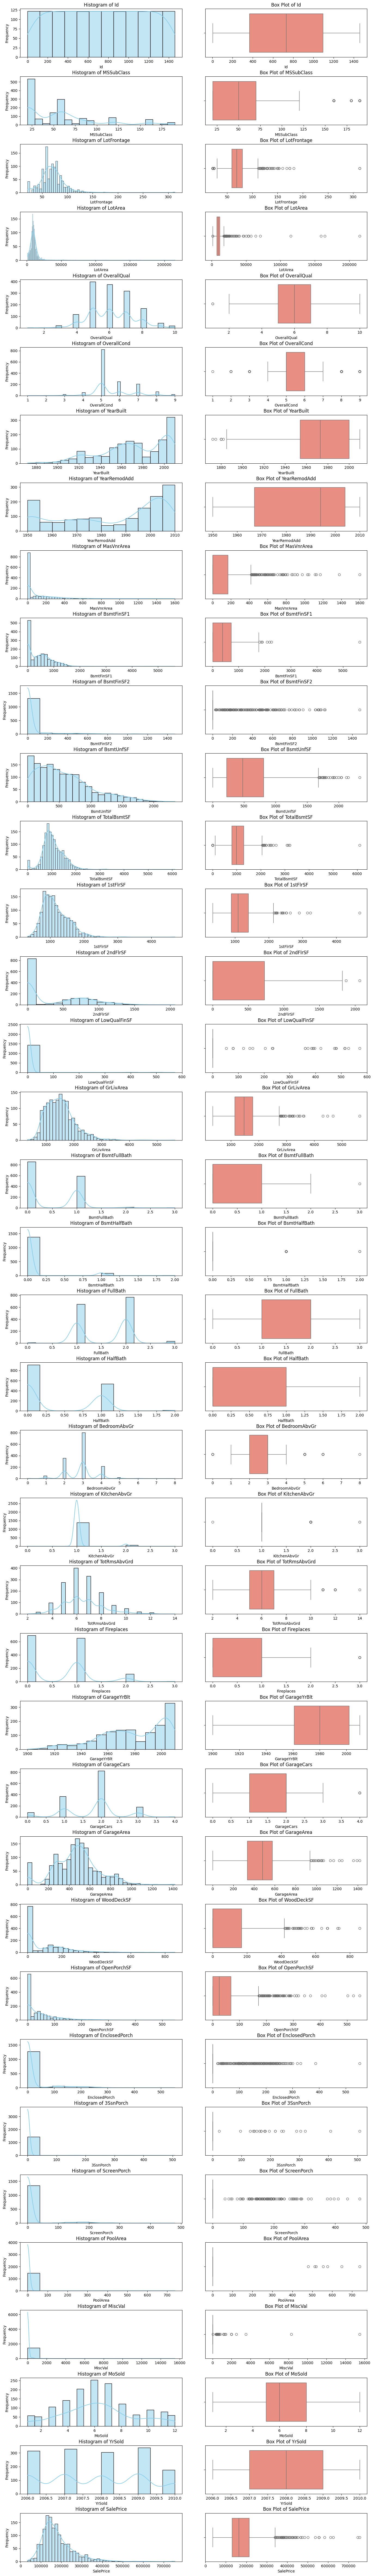

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define number of columns for grid layout
n_cols = 2
n_rows = math.ceil(len(numerical_columns) * 2 / n_cols)

# Set up the matplotlib figure for histograms and box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 2.5))
fig.tight_layout(pad=3.0)
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each numerical column in a grid
for i, column in enumerate(numerical_columns):
    # Histogram with KDE
    sns.histplot(df[column], kde=True, ax=axes[2 * i], color='skyblue')
    axes[2 * i].set_title(f'Histogram of {column}')
    axes[2 * i].set_xlabel(column)
    axes[2 * i].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[2 * i + 1], color='salmon')
    axes[2 * i + 1].set_title(f'Box Plot of {column}')
    axes[2 * i + 1].set_xlabel(column)

# Show the plot
plt.show()


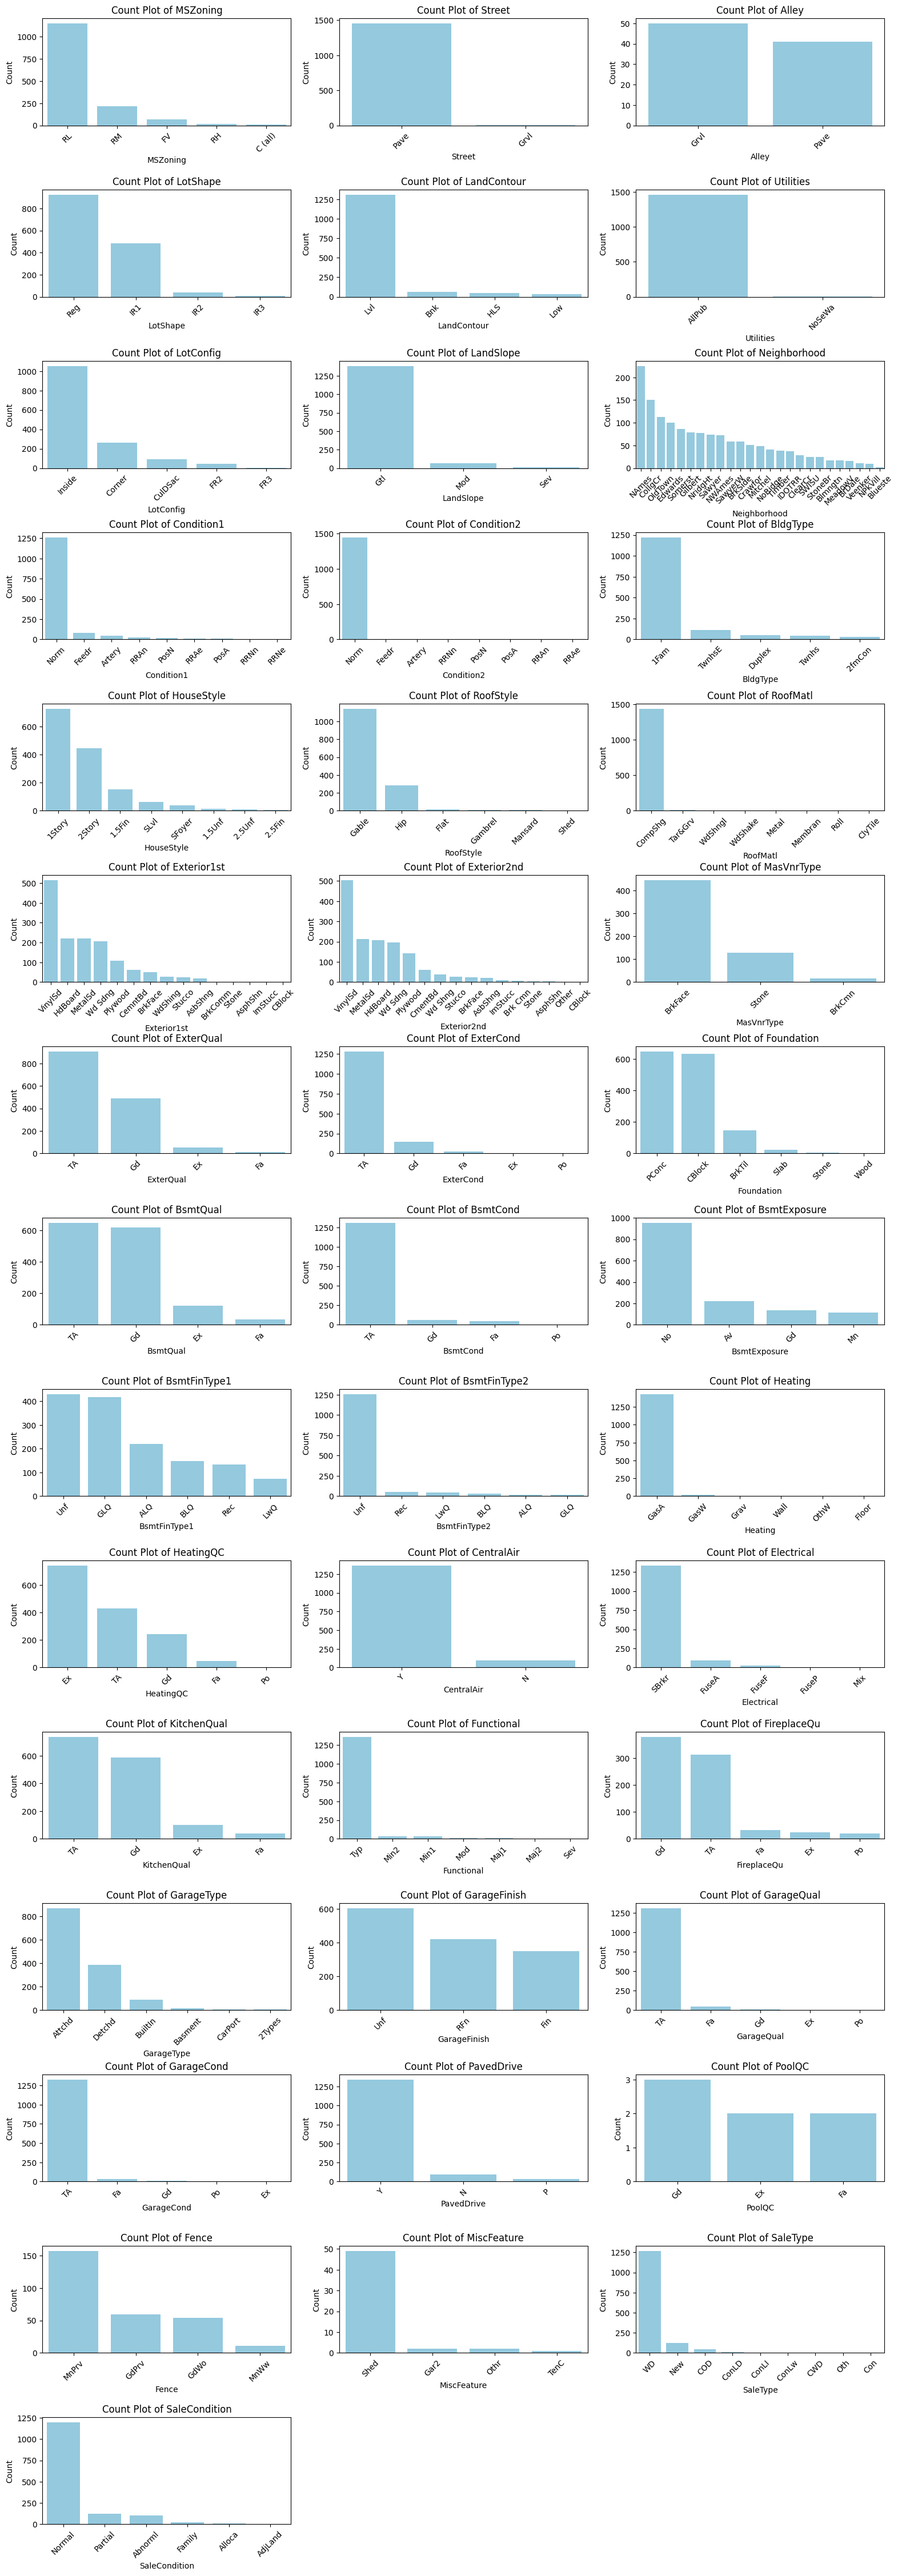

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Define number of columns for grid layout
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Set up the matplotlib figure for bar plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
fig.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.6)  # Increase space between rows
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each categorical column in a grid
for i, column in enumerate(categorical_columns):
    # Bar Plot for each categorical variable
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots in the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Show the plot
plt.show()


# Lets focus on the Target Variable: SalePrice

Descriptive Statistics for SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


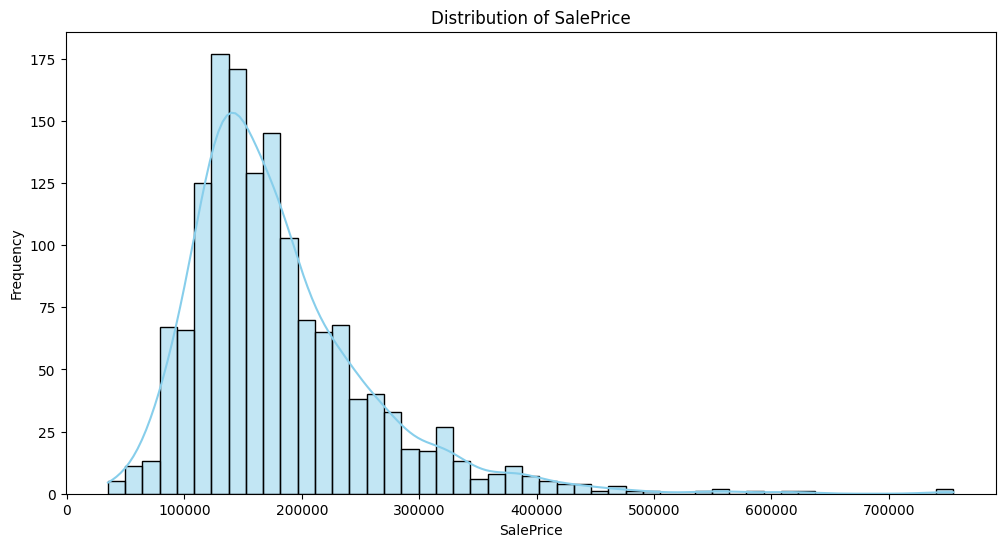

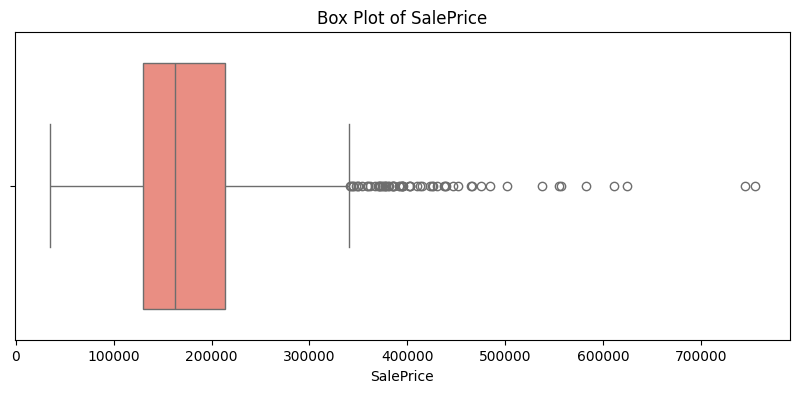

In [17]:
# 1. Descriptive Statistics
print("Descriptive Statistics for SalePrice:")
print(df['SalePrice'].describe())

# 2. Histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# 3. Box Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SalePrice'], color='salmon')
plt.title("Box Plot of SalePrice")
plt.xlabel("SalePrice")
plt.show()


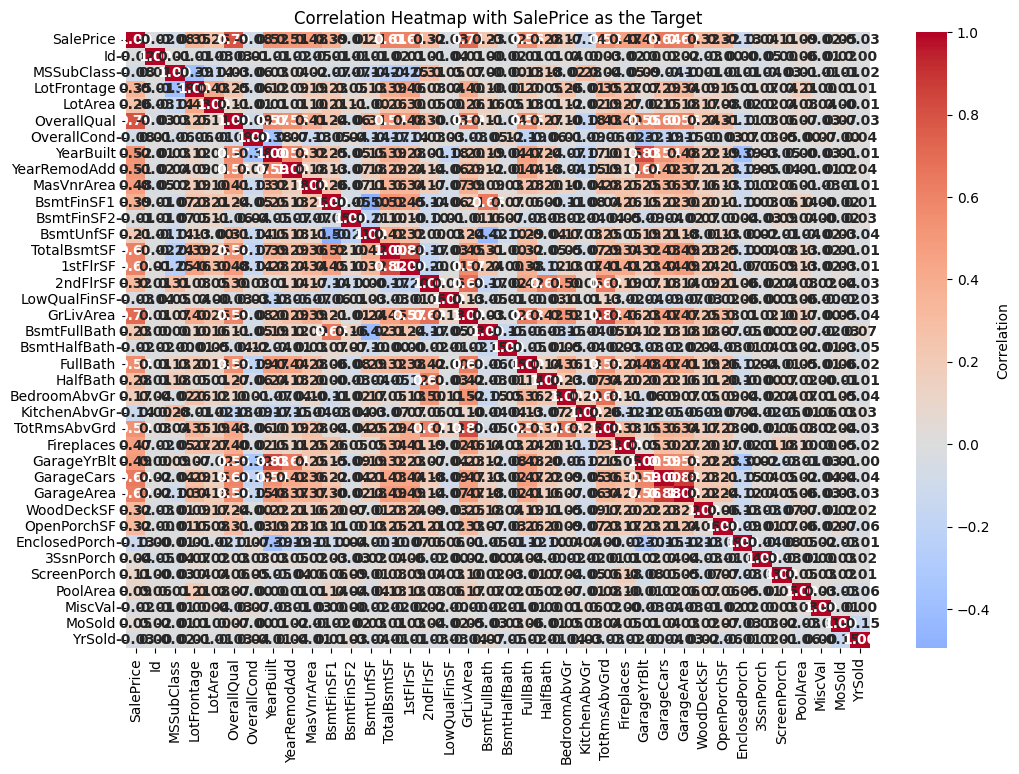

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Reorder columns and rows to place SalePrice at the beginning
correlation_matrix = correlation_matrix.loc[["SalePrice"] + [col for col in correlation_matrix if col != "SalePrice"],
                                            ["SalePrice"] + [col for col in correlation_matrix if col != "SalePrice"]]

# Plot heatmap with enhanced annotations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10, "weight": "bold"},
            center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap with SalePrice as the Target")
plt.show()


> Identify the Top 5 Numerical Variables

Calculate Correlation: Find the correlation between SalePrice and all other numerical features.

Select Top 5: Sort these correlations in descending order and pick the top 5 features.


In [19]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation with SalePrice and sort by absolute value
correlation_with_saleprice = df[numerical_columns].corr()['SalePrice'].abs().sort_values(ascending=False)

# Exclude SalePrice itself and select top 5 most correlated features
top_5_features = correlation_with_saleprice.index[1:6]  # Exclude 'SalePrice' itself
print("Top 5 numerical features correlated with SalePrice:")
print(correlation_with_saleprice[top_5_features])


Top 5 numerical features correlated with SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


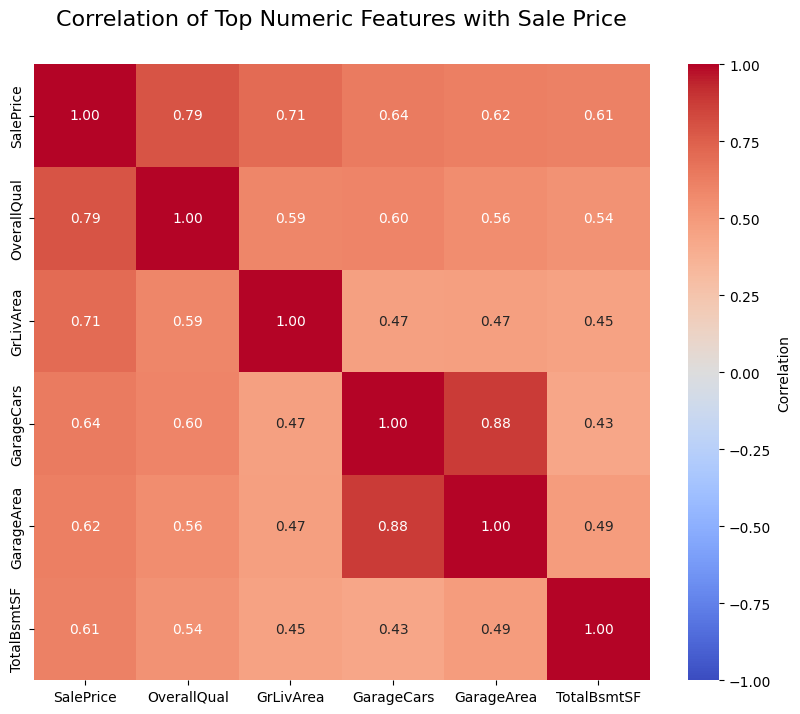

In [20]:

# Calculate correlation matrix for numerical features
correlation = df.select_dtypes(include=['int64', 'float64']).corr()

# Sort the features by their correlation with SalePrice
top_features = correlation['SalePrice'].sort_values(ascending=False).index[:6]  # Top 5 + SalePrice itself
correlation_top_features = correlation.loc[top_features, top_features]

# Create the plot
f, ax = plt.subplots(figsize=(10, 8))
plt.title('Correlation of Top Numeric Features with Sale Price', y=1.05, size=16)

# Plot heatmap with annotations
sns.heatmap(correlation_top_features, annot=True, square=True, cmap='coolwarm', vmax=1, vmin=-1, fmt='.2f',
            annot_kws={"size": 10}, cbar_kws={'label': 'Correlation'})

plt.show()


Top correlated columns: Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


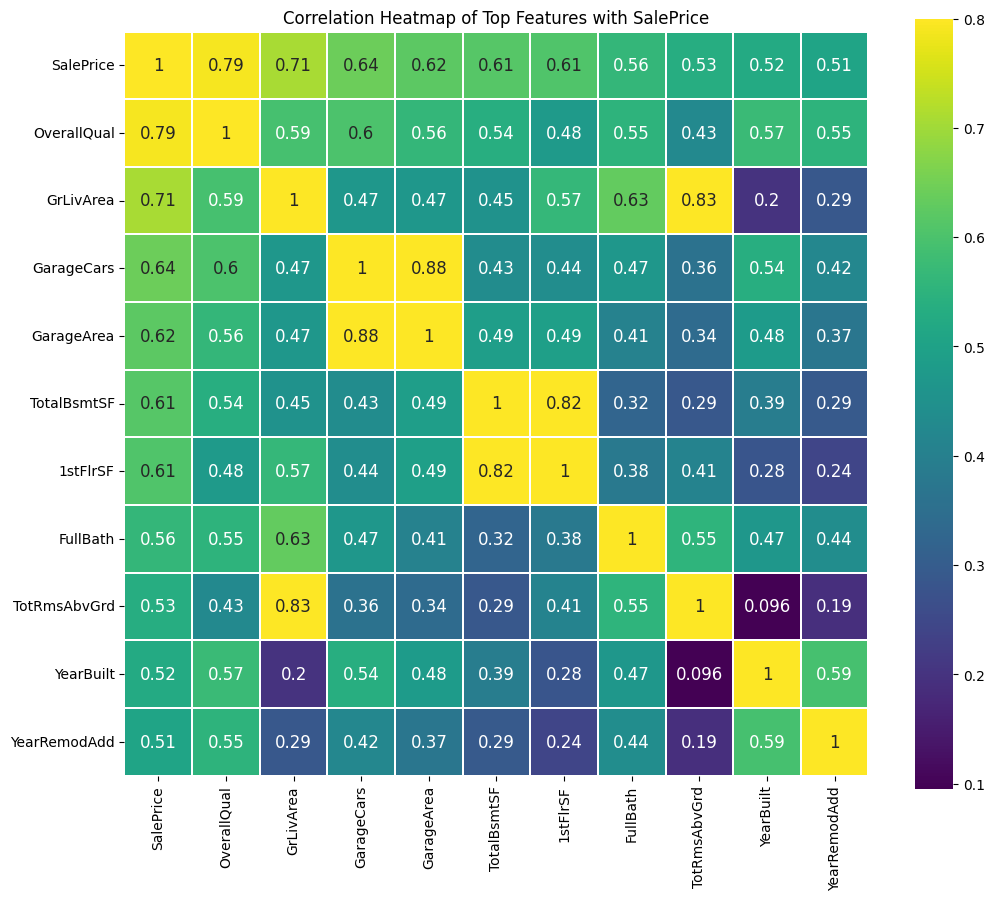

In [21]:
# Set k to select top 10 features plus SalePrice itself
k = 11
cols = correlation['SalePrice'].nlargest(k).index  # Get top features correlated with SalePrice
print("Top correlated columns:", cols)

# Calculate the correlation matrix for these columns
cm = df[cols].corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, yticklabels=cols.values,
            annot_kws={'size': 12})
plt.title('Correlation Heatmap of Top Features with SalePrice')
plt.show()



Univariate Analysis for OverallQual:
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


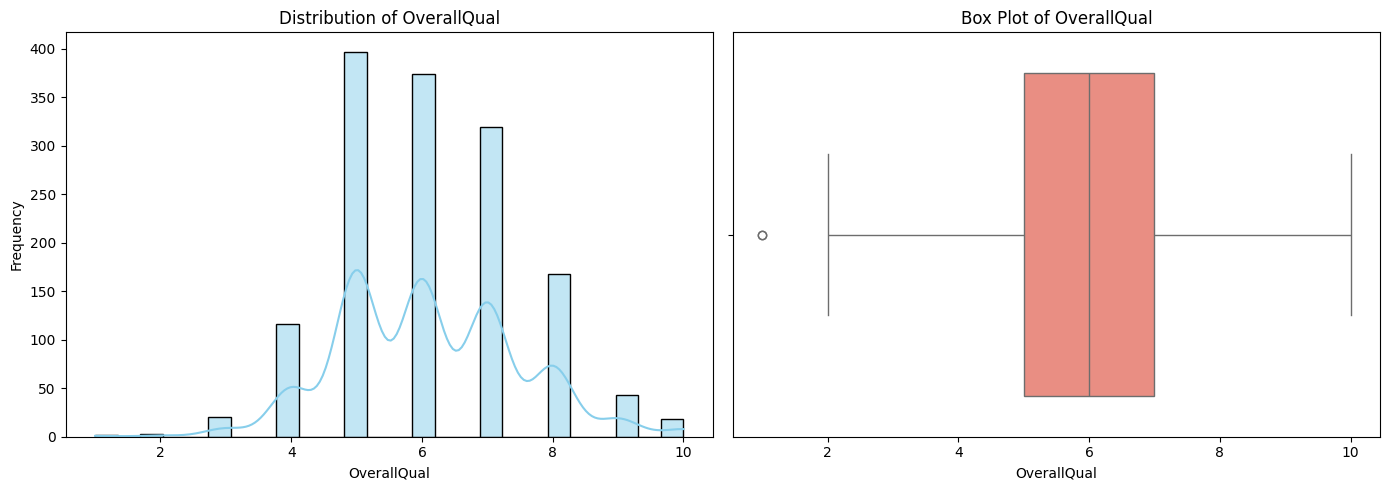


Univariate Analysis for GrLivArea:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


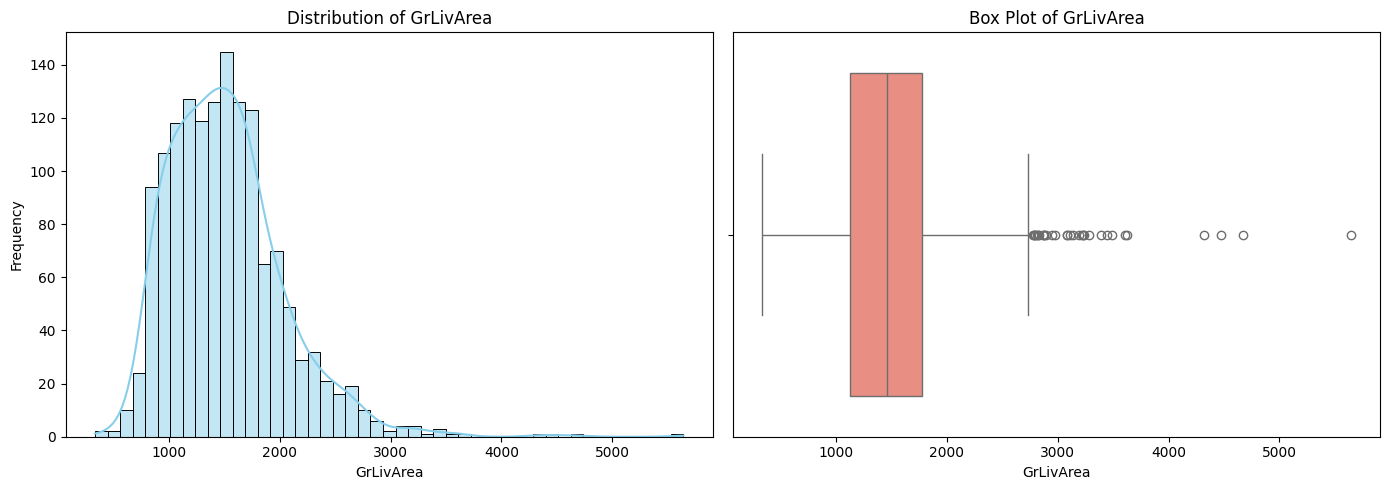


Univariate Analysis for GarageCars:
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


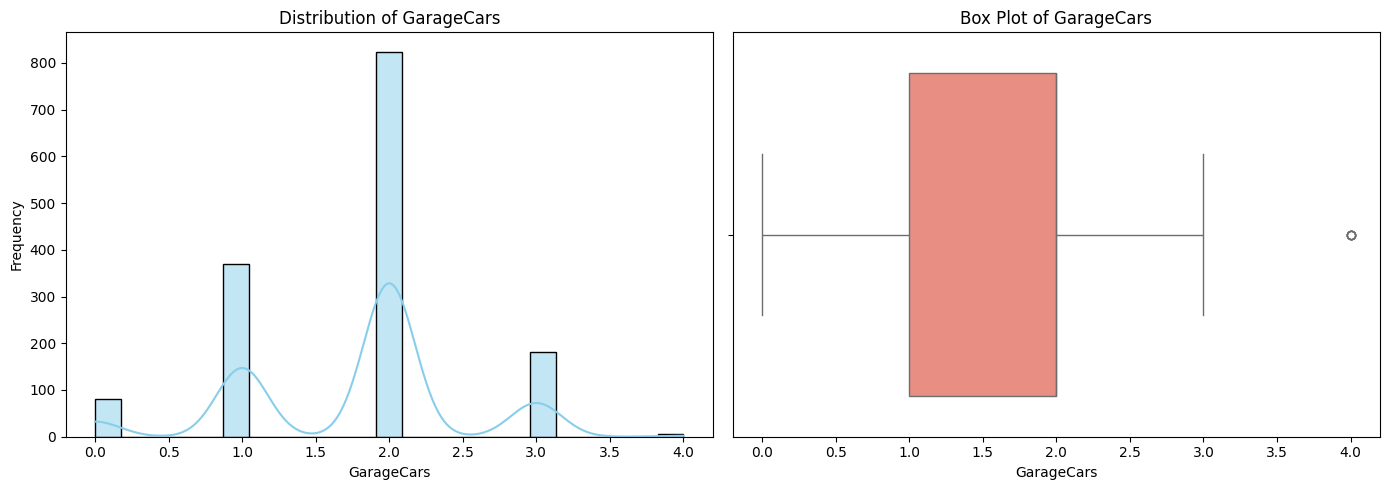


Univariate Analysis for GarageArea:
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


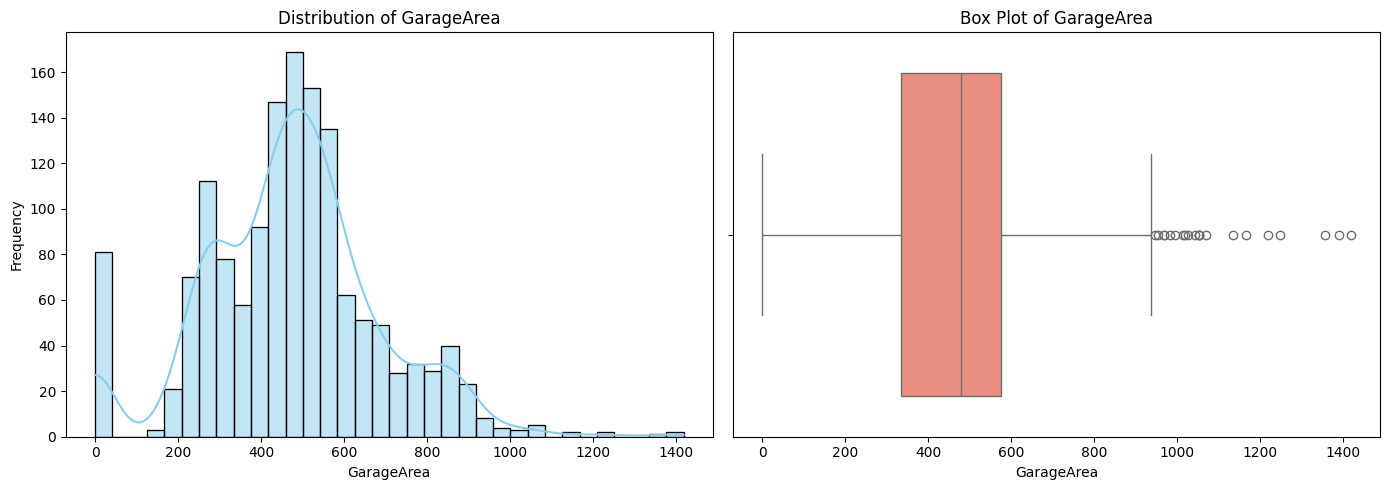


Univariate Analysis for TotalBsmtSF:
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


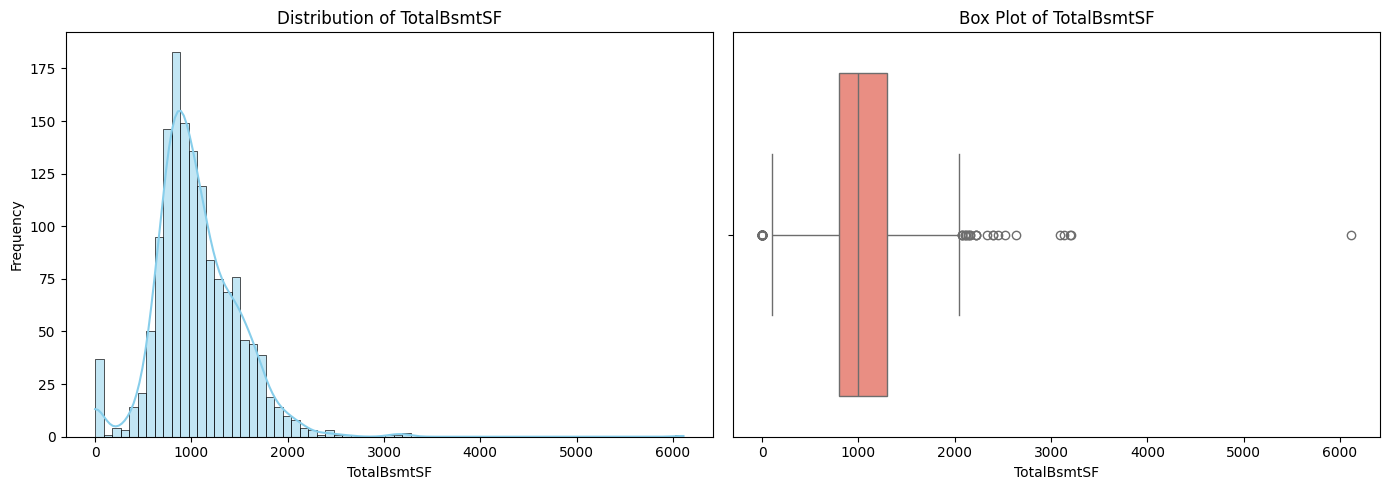

In [22]:
for feature in top_5_features:
    print(f"\nUnivariate Analysis for {feature}:")

    # Descriptive statistics
    print(df[feature].describe())

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram with KDE on the left
    sns.histplot(df[feature], kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Distribution of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Frequency")

    # Box plot on the right
    sns.boxplot(x=df[feature], color='salmon', ax=axes[1])
    axes[1].set_title(f'Box Plot of {feature}')
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


# Pair Plot

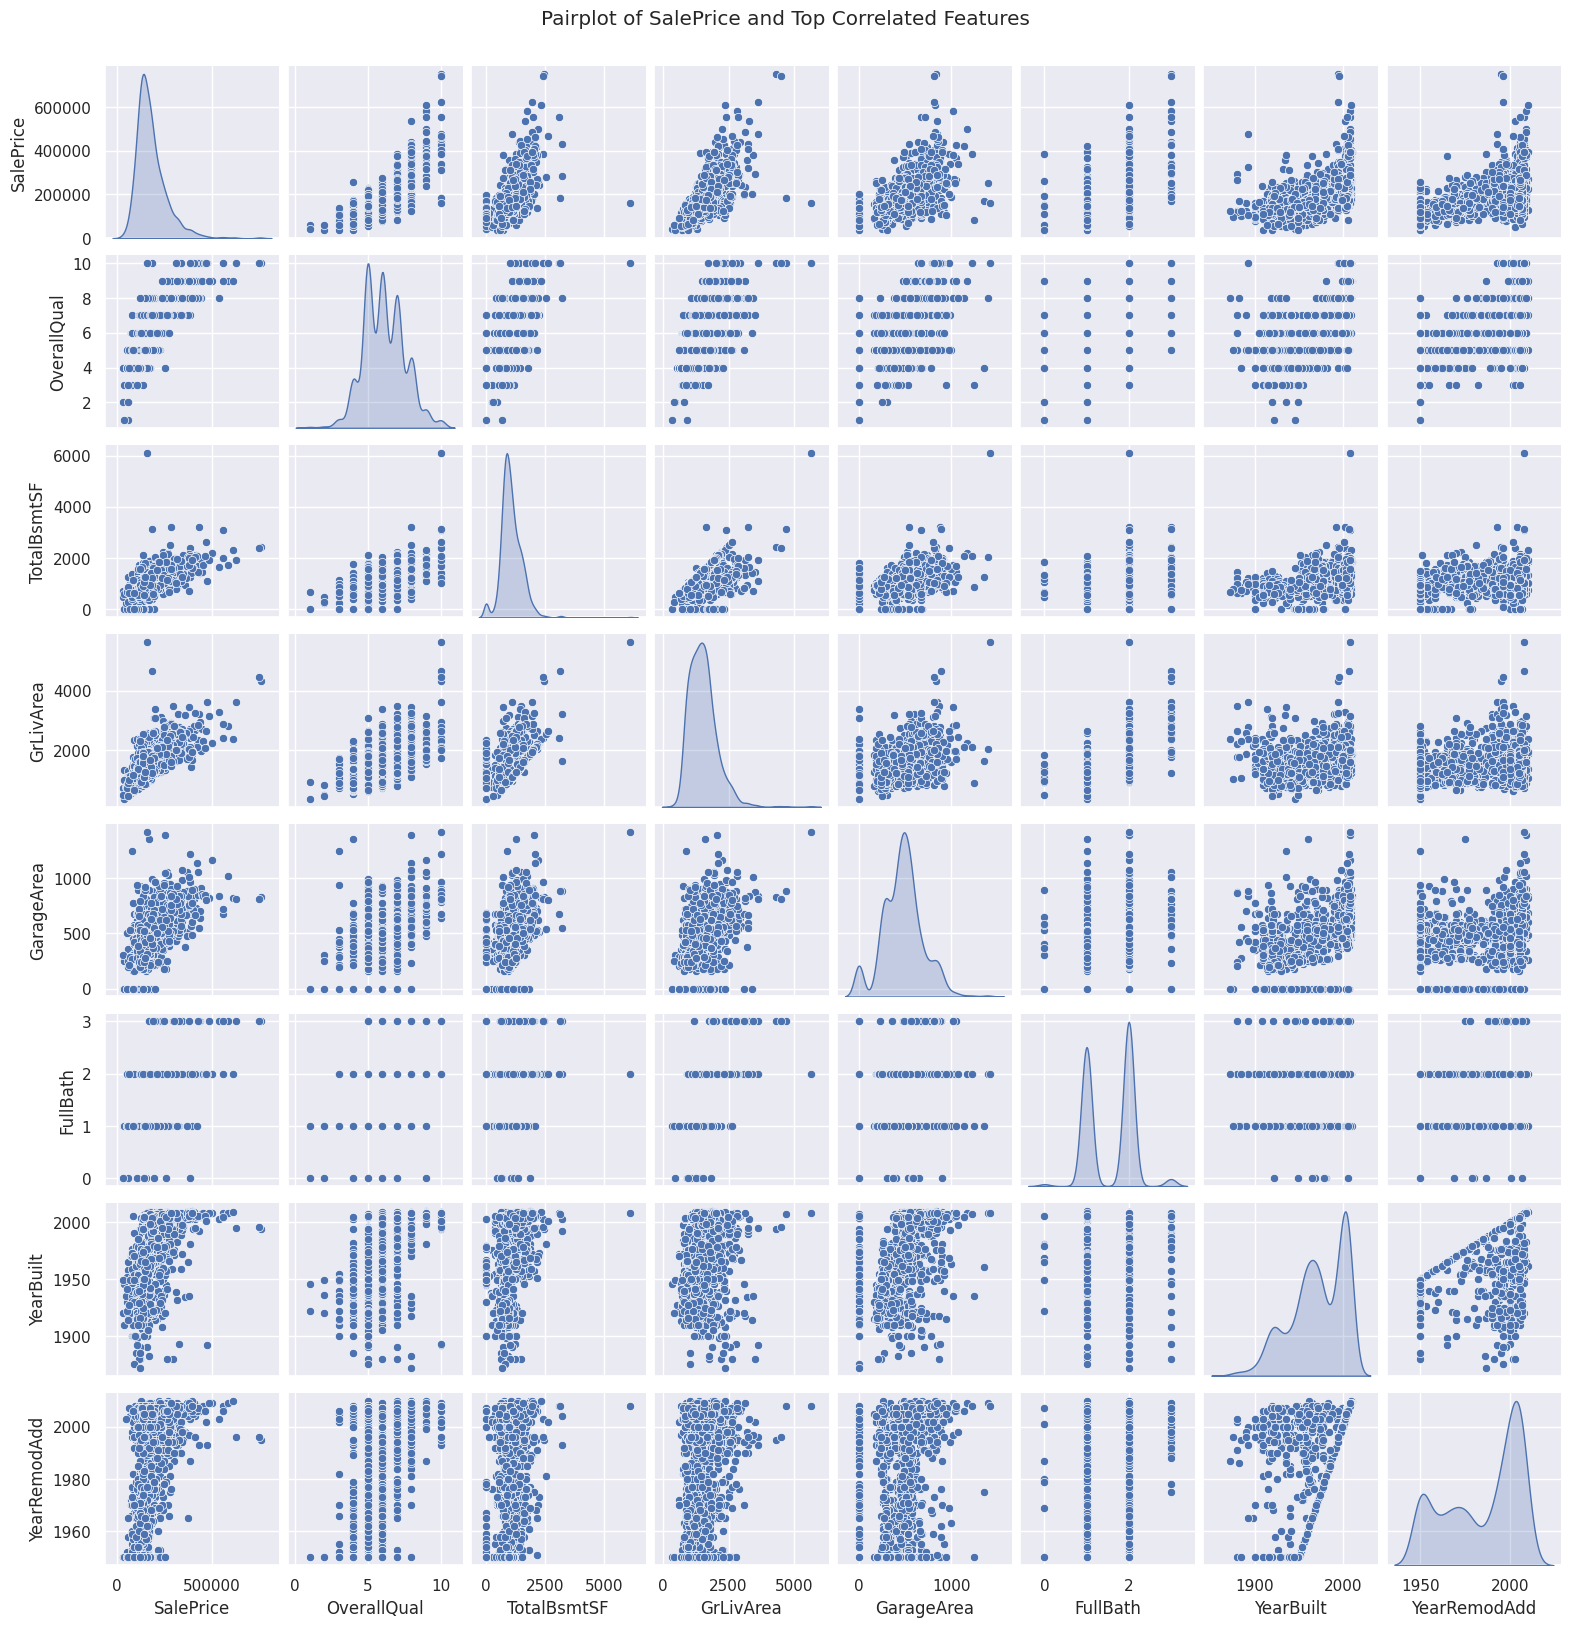

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the Seaborn style
sns.set()

# Define columns to include SalePrice and top correlated features
columns = ['SalePrice', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd']

# Pairplot with scatter plots and KDE on diagonals
sns.pairplot(df[columns], height=2, kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of SalePrice and Top Correlated Features", y=1.02)  # Title for clarity
plt.show()


# Scatter Plot

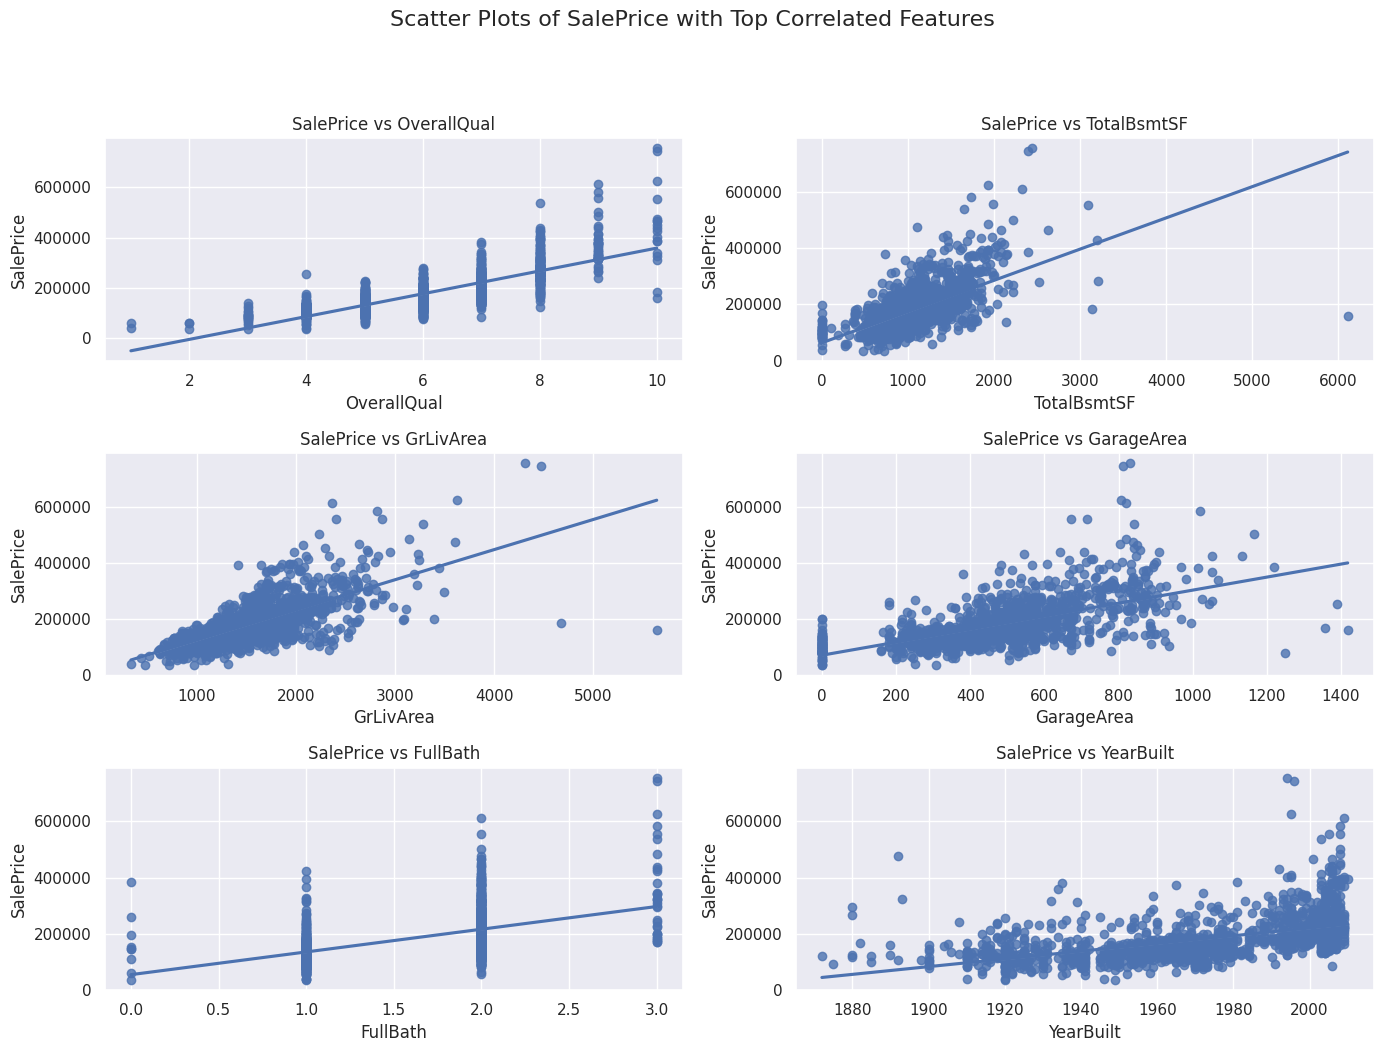

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define list of features to plot against SalePrice
features = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt']

# Set up the figure with a 3x2 grid for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.suptitle('Scatter Plots of SalePrice with Top Correlated Features', y=1.05, fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature in a loop
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='SalePrice', data=df, scatter=True, fit_reg=True, ax=axes[i], ci = False)
    axes[i].set_title(f'SalePrice vs {feature}')

plt.tight_layout()
plt.show()


# Numerical and categorical

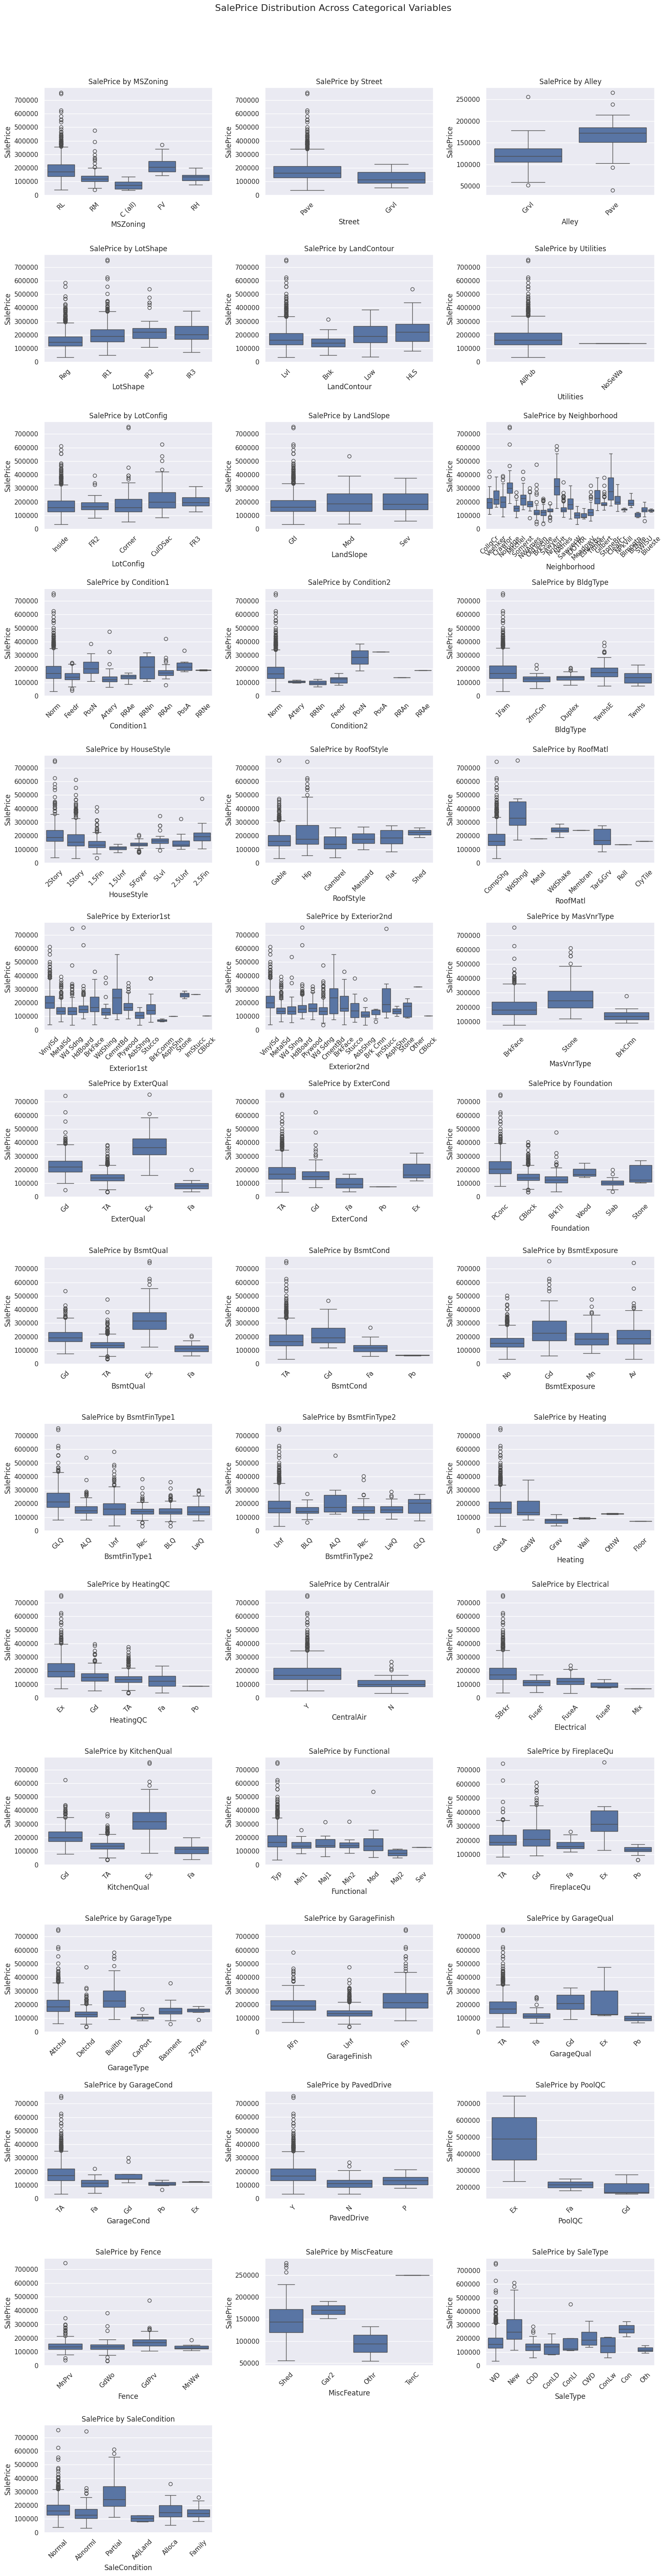

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up a grid layout for compact visualization
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
fig.suptitle('SalePrice Distribution Across Categorical Variables', fontsize=16, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y='SalePrice', data=df, ax=axes[i])
    axes[i].set_title(f'SalePrice by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Dictionary to store F-statistic values for each categorical variable
anova_results = {}

# Perform ANOVA for each categorical variable
for column in categorical_columns:
    # Group SalePrice by each category of the categorical variable
    groups = [df['SalePrice'][df[column] == category].dropna() for category in df[column].unique()]

    # Run ANOVA and store the F-statistic
    f_stat, p_value = f_oneway(*groups)
    anova_results[column] = f_stat

# Sort categorical variables by F-statistic in descending order and select the top 5
top_5_categorical = sorted(anova_results, key=anova_results.get, reverse=True)[:5]

# Display the top 5 most predictive categorical variables
print("Top 5 most predictive categorical variables based on ANOVA F-statistic:")
for column in top_5_categorical:
    print(f"{column}: F-statistic = {anova_results[column]:.2f}")




/tmp/ipykernel_5939/1630380290.py:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(*groups)


Top 5 most predictive categorical variables based on ANOVA F-statistic:
Alley: F-statistic = nan
MasVnrType: F-statistic = nan
ExterQual: F-statistic = 443.33
Foundation: F-statistic = 100.25
Neighborhood: F-statistic = 71.78


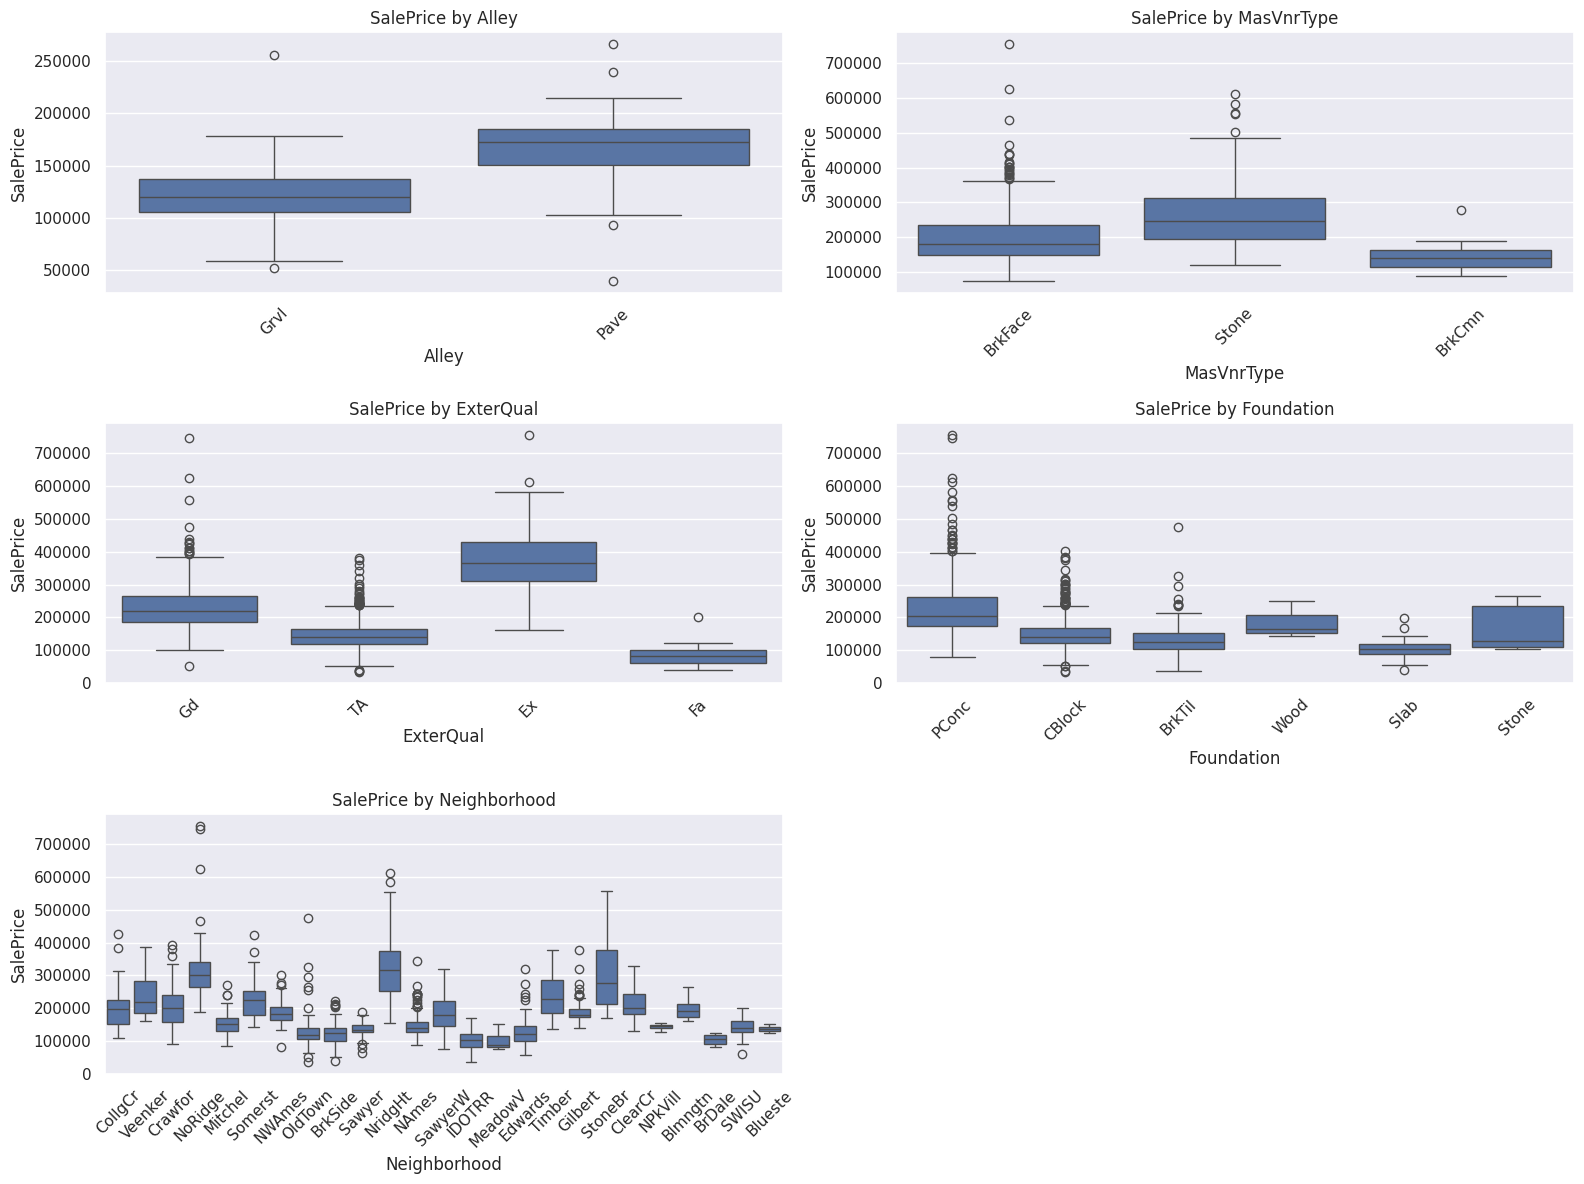

In [27]:
# Plot box plots for each of the top 5 categorical variables
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3x2 grid, with one extra slot for unused space
axes = axes.flatten()  # Flatten for easy iteration

for i, column in enumerate(top_5_categorical):
    sns.boxplot(x=column, y='SalePrice', data=df, ax=axes[i])
    axes[i].set_title(f'SalePrice by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplot (if applicable)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()